Install and load packages

In [ ]:
install.packages('readxl')
install.packages('dplyr')
install.packages('ggplot2')
install.packages('stargazer')
install.packages('purrr')
install.packages('stringr')
install.packages('lessR')
install.packages('fixest')
install.packages('ordinal')
install.packages('effsize')


In [1]:
library(readxl)
library(dplyr)
library(ggplot2)
library(stats)
library(stargazer)
library(purrr)
library(stringr)
library(tidyverse)
library(lessR)
library(fixest)
library(sandwich)
library(lmtest)
library(car)
library(effsize)


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'dplyr'"

Attachement du package : 'dplyr'


Les objets suivants sont masqu'es depuis 'package:stats':

    filter, lag


Les objets suivants sont masqu'es depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'ggplot2'"
Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'stargazer'"

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Warning message in sprintf(gettext(fmt, domain = domain), 

Load df

In [ ]:
# create a list of file names and corresponding is_editorial values
file_names <- c("df_rap_final.xlsx", "df_pop_final.xlsx", "df_variete_final.xlsx", "df_ete_final.xlsx",
                "df_latino_final.xlsx", "df_ambiance_final.xlsx", "df_electro_final.xlsx", "df_rock_final.xlsx",
                "df_indie_final.xlsx", "df_sport_final.xlsx", "df_rnb_final.xlsx", "df_afro_final.xlsx",
                "df_kpop_final.xlsx", "df_detente_final.xlsx", "df_dormir_final.xlsx", "df_soiree_final.xlsx",
                "df_zouk_final.xlsx", "df_reggae_final.xlsx", "df_maison_final.xlsx", "df_decennies_final.xlsx",
                "df_alternatif_final.xlsx", "df_amour_final.xlsx", "df_metal_final.xlsx", "df_jazz_final.xlsx",
                "df_tendances_final.xlsx", "df_equal_final.xlsx", "df_classique_final.xlsx", "df_folk_final.xlsx",
                "df_focus_final.xlsx", "df_soul_final.xlsx", "df_netflix_final.xlsx", "df_enfants_final.xlsx",
                "df_etudiants_final.xlsx", "df_bienetre_final.xlsx", "df_punk_final.xlsx", "df_ambient_final.xlsx",
                "df_country_final.xlsx", "df_blues_final.xlsx", "df_arabe_final.xlsx", "df_voyage_final.xlsx",
                "df_frequency_final.xlsx"
                )


type_values <- c('genre', 'genre', 'genre', 'mood', 'genre', 'mood', 'genre', 'genre', 'genre', 'mood', 'genre',
                 'genre', 'genre', 'mood', 'mood', 'mood', 'genre', 'genre', 'mood', 'trend', 'genre', 'mood',
                 'genre', 'genre', 'trend', 'trend', 'genre', 'genre', 'mood', 'genre', 'trend', 'mood', 'mood',
                 'mood', 'genre', 'genre', 'genre', 'genre', 'genre', 'mood', 'trend'
                 )

df_list <- list()
for (i in seq_along(file_names)) {
  file_name <- file_names[i]
  type <- type_values[i]
  df <- read_xlsx(file_name)
  df$type <- type
  df_list[[i]] <- df
}

df <- Reduce(function(x, y) merge(x, y, all = TRUE), df_list)


In [ ]:
writexl::write_xlsx(df, "df_final.xlsx")


Data management

In [2]:
df <- read_xlsx("df_final.xlsx")

df$type <- relevel(as.factor(df$type), ref = "genre")        # Apply relevel function


Rao-Stirling

In [3]:
# Extract numeric values
df$diversity_clean <- as.numeric(gsub("[^[:digit:].-]", "", df$stirling))
df$diversity_clean_2 <- as.numeric(gsub("[^[:digit:].-]", "", df$stirling_2))

# Print numeric values
df$diversity_clean
df$diversity_clean_2

# Scale values from 0 to 1
df$diversity_norm <- rescale(diversity_clean, df, kind='z')
df$diversity_norm_2 <- rescale(diversity_clean_2, df, kind='z')

# Print scaled values
df$diversity_norm
df$diversity_norm_2


[1] 0.20046316 0.13160151 0.14782763 0.18989914 0.11178719 0.19065135
   [7] 0.14738779 0.20547911 0.23333909 0.07929024 0.21999787 0.21941094
  [13] 0.22083435 0.20288796 0.26660915 0.19630912 0.16813421 0.12426035
  [19] 0.14161193 0.24947489 0.14859028 0.21365044 0.25599055 0.14356902
  [25] 0.13473431 0.14507671 0.23322084 0.15999830 0.14452142 0.16698914
  [31] 0.16419331 0.13669054 0.23632598 0.14099409 0.20414390 0.23275709
  [37] 0.18823602 0.24668406 0.15576238 0.20591203 0.11686386 0.11961448
  [43] 0.22427778 0.13198682 0.23109946 0.09057485 0.17598290 0.09655878
  [49] 0.23300898 0.17823571 0.20885938 0.18228313 0.25334481 0.29091700
  [55] 0.13448667 0.12366183 0.12924590 0.10700570 0.12999429 0.28840393
  [61] 0.12097514 0.13974479 0.10644758 0.14412266 0.11344910 0.11076538
  [67] 0.20866637 0.18584294 0.24545614 0.25600132 0.19154121 0.14897862
  [73] 0.20428202 0.16959134 0.22343085 0.22823504 0.18914729 0.09342908
  [79] 0.12675364 0.15824815 0.22753717 0.23702419 0.22230327 0.19068093
  [85] 0.22193432 0.15840711 0.23027547 0.21237746 0.15654424 0.22207358
  [91] 0.20490560 0.18522133 0.17727567 0.24389011 0.14337767 0.18593186
  [97] 0.13803555 0.14278562 0.23348752 0.14697484 0.13750178 0.21709089
 [103] 0.28613735 0.15128499 0.25835350 0.19759099 0.16372507 0.15149921
 [109] 0.22800109 0.22247559 0.14183385 0.25326370 0.22954007 0.20560730
 [115] 0.21884657 0.27104957 0.20547539 0.18047913 0.22567598 0.26343294
 [121] 0.14139532 0.20496204 0.08514481 0.14148807 0.14158958 0.14848829
 [127] 0.22927268 0.25464530 0.13383226 0.16610246 0.14238658 0.19051431
 [133] 0.18505384 0.28873923 0.13855527 0.18301484 0.24493686 0.12972356
 [139] 0.11674070 0.26762517 0.16238241 0.16893609 0.23610575 0.24869313
 [145] 0.11996124 0.15264414 0.14068291 0.20443362 0.12396715 0.13918234
 [151] 0.11763602 0.20038009 0.22457689 0.20412823 0.24261163 0.20933230
 [157] 0.15982378 0.14368963 0.23232617 0.14482179 0.22797379 0.16387606
 [163] 0.14604787 0.24437012 0.11885642 0.12300831 0.07885789 0.10480281
 [169] 0.21254059 0.12165369 0.22172043 0.12726321 0.18709507 0.17963065
 [175] 0.12834500 0.19411341 0.10546990 0.23897355 0.21803465 0.12838178
 [181] 0.12294260 0.23542150 0.12363378 0.19524452 0.19245925 0.13906592
 [187] 0.19900763 0.24738061 0.18831709 0.10851599 0.20806509 0.14163090
 [193] 0.13359924 0.19895446 0.17973691 0.16726042 0.25277206 0.22012514
 [199] 0.14905717 0.15554860 0.15518517 0.21015162 0.09206863 0.19085493
 [205] 0.21961554 0.23241570 0.15069210 0.17938755 0.12879330 0.14687582
 [211] 0.23957987 0.22047157 0.23063135 0.14760604 0.10660563 0.13980836
 [217] 0.17571279 0.18121257 0.19459374 0.20467934 0.23350963 0.21984588
 [223] 0.11458866 0.23974104 0.14888758 0.24973960 0.18678155 0.19225043
 [229] 0.25169313 0.21729734 0.17350941 0.25251049 0.13605143 0.19423378
 [235] 0.28758327 0.17706295 0.12313596 0.24045759 0.17099016 0.27394866
 [241] 0.14307714 0.17070715 0.20791410 0.11736432 0.20253744 0.24574370
 [247] 0.18692779 0.27373157 0.22057939 0.17980099 0.23355297 0.10838226
 [253] 0.13225570 0.13817493 0.17532769 0.23046234 0.19943636 0.27602037
 [259] 0.29071047 0.13648232 0.20026165 0.10486092 0.13621030 0.16916819
 [265] 0.24919097 0.15069130 0.17472363 0.14864578 0.19228754 0.16649541
 [271] 0.33312108 0.25270340 0.17287442 0.12553767 0.26822475 0.11462366
 [277] 0.12302170 0.20432733 0.15684691 0.17123833 0.10388235 0.14384630
 [283] 0.14830676 0.23861055 0.22434702 0.14657630 0.19136069 0.25872847
 [289] 0.15339865 0.22197023 0.12461289 0.14618274 0.28212524 0.17257793
 [295] 0.25552929 0.19714616 0.23886646 0.24948780 0.26707351 0.17700830
 [301] 0.17724685 0.18206941 0.14998807 0.26544664 0.18812002 0.14289984
 [307] 0.19867397 0.13089562 0.16459475 0.20316838 0.33920146 0.23628650
 [313] 0.17166398 0.25783865 0.16158231 0.27167993 0.12492848 0.18228996
 [319] 0.18694440 0.25050504 0.21870596 0.22055367 0.16815378 0.16366447
 [325] 0.12764829 0.11507785 0.25935227 0.14635314 0.19595857

[1] 0.31098207 0.31512355 0.27282038 0.35902098 0.30400043 0.29986598
   [7] 0.31318073 0.33051469 0.29166153 0.28339080 0.28160013 0.30094303
  [13] 0.24720387 0.26835902 0.28828142 0.26918363 0.28451229 0.29120081
  [19] 0.30404471 0.30969952 0.34610998 0.30622372 0.38152771 0.28099892
  [25] 0.30357410 0.27256097 0.31068403 0.31579442 0.31855302 0.30066477
  [31] 0.24619416 0.28978629 0.34272008 0.30171208 0.35379472 0.23275709
  [37] 0.24051426 0.32393889 0.32100507 0.30116928 0.31234732 0.27568584
  [43] 0.28255164 0.30267605 0.25836018 0.32027917 0.31642801 0.31446005
  [49] 0.30541800 0.34356295 0.30545143 0.29879179 0.31135602 0.33993902
  [55] 0.35469257 0.33412003 0.35000902 0.29033625 0.30857442 0.34394897
  [61] 0.22835031 0.31390924 0.25677200 0.27701767 0.24543419 0.28582231
  [67] 0.20866637 0.30527138 0.29694990 0.33144609 0.34082893 0.23359398
  [73] 0.31772609 0.32127173 0.32598759 0.31261263 0.24987085 0.23715726
  [79] 0.27827709 0.32414627 0.34181591 0.36458958 0.35361158 0.39424640
  [85] 0.33324569 0.36331820 0.26436993 0.32210665 0.34906188 0.22207358
  [91] 0.28494364 0.35413750 0.30282274 0.24389011 0.26821295 0.18593186
  [97] 0.30087384 0.27039147 0.32703513 0.33908903 0.33671392 0.33472365
 [103] 0.28613735 0.39224511 0.32677155 0.27524029 0.31669527 0.36157964
 [109] 0.33821458 0.34208868 0.28314392 0.49894880 0.35444124 0.27997718
 [115] 0.39113595 0.35463850 0.28141538 0.29304910 0.30009905 0.35811278
 [121] 0.28090658 0.25803127 0.26435621 0.23720045 0.28620007 0.37030726
 [127] 0.31220319 0.29907812 0.28504849 0.30296462 0.33979385 0.32303203
 [133] 0.29238790 0.34484494 0.32160700 0.28741244 0.31625042 0.28232235
 [139] 0.30689983 0.32056678 0.30153719 0.32605466 0.25441183 0.31925511
 [145] 0.27357725 0.29604835 0.34381889 0.28240219 0.24275974 0.22001770
 [151] 0.21658400 0.37514152 0.35386684 0.20412823 0.31256519 0.25210098
 [157] 0.27314543 0.32020058 0.34508698 0.36331954 0.32004094 0.30414783
 [163] 0.33382794 0.32072623 0.26301960 0.28385089 0.28460621 0.23270779
 [169] 0.30980654 0.29040442 0.22172043 0.25474849 0.25474191 0.28861327
 [175] 0.27533782 0.27750032 0.25495359 0.34579774 0.29030266 0.27742729
 [181] 0.29060904 0.38043150 0.30413707 0.34940844 0.30206571 0.26387723
 [187] 0.29752961 0.30303011 0.29546378 0.30169472 0.34132641 0.29672139
 [193] 0.32604628 0.19895446 0.31468985 0.34150829 0.38578328 0.35897494
 [199] 0.35063344 0.35647389 0.31209708 0.24920072 0.29131634 0.26693619
 [205] 0.32178458 0.26557098 0.37098978 0.30314091 0.29839396 0.33918648
 [211] 0.28883733 0.41006826 0.27732266 0.27450485 0.29431479 0.30799052
 [217] 0.27192483 0.29830491 0.34182768 0.33344519 0.28753292 0.33301054
 [223] 0.27548256 0.40869107 0.30766589 0.31732790 0.30702788 0.30476928
 [229] 0.36388060 0.31699742 0.36758925 0.32983020 0.30184053 0.27330611
 [235] 0.38058320 0.34625135 0.29854626 0.34134696 0.28744085 0.34763976
 [241] 0.32298566 0.35664047 0.27618061 0.29487194 0.20253744 0.24574370
 [247] 0.36335225 0.35603423 0.26344705 0.42501046 0.31393109 0.27909861
 [253] 0.31848188 0.30032235 0.30544307 0.34638118 0.31062197 0.33515141
 [259] 0.37205133 0.34171593 0.30977699 0.32647465 0.34693017 0.25070643
 [265] 0.30484747 0.35027115 0.33726889 0.29182067 0.25656204 0.29892008
 [271] 0.35993134 0.33085199 0.27108109 0.24498090 0.36041548 0.26089426
 [277] 0.29474821 0.30596932 0.31550998 0.30346265 0.26485044 0.29806246
 [283] 0.30491203 0.29697932 0.35073548 0.36400175 0.27782167 0.36120407
 [289] 0.26780649 0.30008255 0.24852093 0.32112852 0.31083226 0.36650186
 [295] 0.30022781 0.31632775 0.28857629 0.38407233 0.33144086 0.28624525
 [301] 0.30406957 0.33590975 0.29542303 0.35594994 0.39686502 0.26805294
 [307] 0.31492486 0.32224554 0.33501213 0.35653242 0.44394568 0.32978483
 [313] 0.23519390 0.30953175 0.32727684 0.40343962 0.21896842 0.27239457
 [319] 0.27764719 0.32667642 0.33090242 0.31776621 0.35249245 0.27864867
 [325] 0.27892275 0.25279080 0.29918798 0.32164674 0.33777907

[1]  0.280 -1.028 -0.720  0.079 -1.405  0.094 -0.728  0.376  0.905 -2.023
  [11]  0.651  0.640  0.667  0.326  1.537  0.201 -0.334 -1.168 -0.838  1.212
  [21] -0.706  0.531  1.335 -0.801 -0.969 -0.772  0.903 -0.489 -0.783 -0.356
  [31] -0.409 -0.932  0.962 -0.850  0.350  0.894  0.048  1.159 -0.569  0.384
  [41] -1.309 -1.256  0.733 -1.021  0.862 -1.808 -0.185 -1.694  0.899 -0.142
  [51]  0.440 -0.065  1.285  1.999 -0.974 -1.179 -1.073 -1.496 -1.059  1.951
  [61] -1.230 -0.874 -1.507 -0.791 -1.373 -1.424  0.436  0.002  1.135  1.336
  [71]  0.111 -0.698  0.353 -0.307  0.717  0.808  0.065 -1.754 -1.121 -0.522
  [81]  0.795  0.975  0.695  0.094  0.688 -0.519  0.847  0.507 -0.554  0.691
  [91]  0.365 -0.009 -0.160  1.106 -0.805  0.004 -0.906 -0.816  0.908 -0.736
 [101] -0.916  0.596  1.908 -0.654  1.380  0.226 -0.418 -0.650  0.804  0.699
 [111] -0.834  1.284  0.833  0.378  0.630  1.622  0.375 -0.100  0.759  1.477
 [121] -0.842  0.366 -1.911 -0.841 -0.839 -0.708  0.828  1.310 -0.986 -0.373
 [131] -0.824  0.091 -0.013  1.958 -0.896 -0.051  1.125 -1.064 -1.311  1.557
 [141] -0.444 -0.319  0.958  1.197 -1.250 -0.629 -0.856  0.356 -1.174 -0.884
 [151] -1.294  0.279  0.738  0.350  1.081  0.449 -0.492 -0.799  0.886 -0.777
 [161]  0.803 -0.415 -0.754  1.115 -1.271 -1.192 -2.031 -1.538  0.510 -1.218
 [171]  0.684 -1.111  0.026 -0.116 -1.090  0.160 -1.525  1.012  0.614 -1.090
 [181] -1.193  0.945 -1.180  0.181  0.128 -0.887  0.253  1.172  0.049 -1.467
 [191]  0.425 -0.838 -0.991  0.252 -0.114 -0.351  1.274  0.654 -0.697 -0.573
 [201] -0.580  0.464 -1.780  0.098  0.644  0.887 -0.666 -0.120 -1.082 -0.738
 [211]  1.024  0.660  0.854 -0.724 -1.504 -0.873 -0.190 -0.086  0.169  0.360
 [221]  0.908  0.649 -1.352  1.027 -0.700  1.217  0.020  0.124  1.254  0.600
 [231] -0.232  1.269 -0.944  0.162  1.936 -0.165 -1.189  1.040 -0.280  1.677
 [241] -0.810 -0.285  0.422 -1.299  0.320  1.141  0.023  1.673  0.662 -0.112
 [251]  0.909 -1.470 -1.016 -0.904 -0.197  0.850  0.261  1.716  1.995 -0.936
 [261]  0.276 -1.537 -0.941 -0.315  1.206 -0.666 -0.209 -0.705  0.125 -0.365
 [271]  2.801  1.273 -0.244 -1.144  1.568 -1.351 -1.192  0.354 -0.549 -0.275
 [281] -1.555 -0.796 -0.711  1.005  0.734 -0.744  0.107  1.388 -0.614  0.689
 [291] -1.161 -0.751  1.832 -0.250  1.327  0.217  1.010  1.212  1.546 -0.166
 [301] -0.161 -0.069 -0.679  1.515  0.046 -0.814  0.246 -1.042 -0.401  0.332
 [311]  2.917  0.961 -0.267  1.371 -0.459  1.634 -1.155 -0.065  0.023  1.231
 [321]  0.627  0.662 -0.334 -0.419 -1.104 -1.343  1.399 -0.748  0.195 -0.159
 [331]  1.835 -0.197 -0.280 -1.251  0.556 -0.778  0.310  1.551  0.909  0.581
 [341] -0.787 -1.748 -0.593  0.127  1.306  0.052 -1.213 -0.951  0.516  1.234
 [351] -0.780  0.789 -0.307 -0.692 -0.799  0.716 -0.720  0.214 -0.399 -0.534
 [361] -0.454  1.204  0.536 -0.608  1.694 -0.692 -0.325  0.824 -0.697  0.767
 [371] -1.003  0.840 -0.992  0.239 -0.386  0.052  0.422 -0.050 -1.416  1.078
 [381] -0.773 -0.792  0.191 -0.035 -0.489  0.174  0.078  0.489  0.128 -0.668
 [391] -0.878  0.451 -0.645  0.089 -0.743  2.336 -0.428  0.236  0.735  0.966
 [401] -1.372 -0.405  0.294  0.538 -1.013  0.452 -0.117  2.204 -0.021  1.949
 [411]  0.667  0.529  0.688 -0.801 -0.200 -1.519 -1.054 -1.168  1.696  0.867
 [421]  0.084  1.901 -0.468 -0.725  0.352 -0.153 -0.681 -0.843  0.708  0.309
 [431] -0.191  0.387  0.602 -0.311  0.299 -1.323  1.140 -1.408 -0.594 -0.278
 [441] -0.949 -0.518  1.288 -1.181  0.867 -0.697  0.103  1.069 -0.132 -0.218
 [451]  0.598  0.050  0.240 -1.392  0.647  0.158 -0.839 -0.924  0.431 -0.006
 [461] -0.802 -0.206  0.682 -1.075 -0.640  0.960  0.165  0.401  1.011  1.223
 [471]  0.806 -0.037  1.550 -0.601 -0.957 -0.657 -0.634 -0.975 -0.843  0.598
 [481]  0.291 -0.381 -1.059 -0.465  0.519  0.761 -0.399 -1.113  0.237 -1.350
 [491]  0.924  1.444  0.484  1.525  1.354 -0.869 -1.451  1.044 -0.471 -0.297
 [501] -0.942  0.774  1.194  0.009 -0.215 -1.322  0.403  1.075 -1.053 -0.613
 [511] -0.485  0.238  1.317 -0.418 -0.063 -1.342 -0.280  2.717  2.647  0.424

[1]  0.018  0.097 -0.711  0.935 -0.116 -0.195  0.060  0.391 -0.351 -0.509
  [11] -0.543 -0.174 -1.200 -0.796 -0.416 -0.781 -0.488 -0.360 -0.115 -0.007
  [21]  0.688 -0.073  1.365 -0.555 -0.124 -0.716  0.012  0.109  0.162 -0.179
  [31] -1.220 -0.387  0.624 -0.159  0.835 -1.476 -1.328  0.265  0.209 -0.170
  [41]  0.044 -0.656 -0.525 -0.141 -0.987  0.195  0.122  0.084 -0.089  0.640
  [51] -0.088 -0.215  0.025  0.571  0.852  0.459  0.763 -0.377 -0.028  0.647
  [61] -1.560  0.073 -1.018 -0.631 -1.234 -0.463 -1.936 -0.091 -0.250  0.408
  [71]  0.588 -1.460  0.146  0.214  0.304  0.049 -1.149 -1.392 -0.607  0.269
  [81]  0.606  1.041  0.832  1.608  0.443  1.017 -0.872  0.230  0.745 -1.680
  [91] -0.480  0.842 -0.138 -1.264 -0.799 -2.370 -0.175 -0.757  0.324  0.554
 [101]  0.509  0.471 -0.457  1.569  0.319 -0.665  0.127  0.984  0.538  0.612
 [111] -0.514  3.607  0.847 -0.574  1.548  0.851 -0.547 -0.325 -0.190  0.918
 [121] -0.557 -0.994 -0.873 -1.391 -0.456  1.150  0.041 -0.210 -0.478 -0.135
 [131]  0.568  0.248 -0.337  0.664  0.220 -0.432  0.118 -0.530 -0.060  0.201
 [141] -0.163  0.305 -1.063  0.176 -0.697 -0.268  0.645 -0.528 -1.285 -1.719
 [151] -1.785  1.243  0.837 -2.023  0.048 -1.107 -0.705  0.194  0.669  1.017
 [161]  0.191 -0.113  0.454  0.204 -0.898 -0.500 -0.486 -1.477 -0.005 -0.375
 [171] -1.687 -1.056 -1.056 -0.410 -0.663 -0.622 -1.052  0.682 -0.377 -0.623
 [181] -0.371  1.344 -0.113  0.751 -0.153 -0.882 -0.239 -0.134 -0.279 -0.160
 [191]  0.597 -0.255  0.305 -2.122  0.088  0.601  1.446  0.934  0.775  0.886
 [201]  0.039 -1.162 -0.358 -0.823  0.224 -0.850  1.163 -0.132 -0.223  0.556
 [211] -0.405  1.910 -0.625 -0.679 -0.301 -0.040 -0.728 -0.224  0.607  0.447
 [221] -0.430  0.438 -0.660  1.883 -0.046  0.139 -0.058 -0.101  1.028  0.132
 [231]  1.099  0.378 -0.157 -0.702  1.347  0.691 -0.220  0.597 -0.432  0.718
 [241]  0.247  0.889 -0.647 -0.290 -2.053 -1.228  1.018  0.878 -0.890  2.195
 [251]  0.074 -0.591  0.161 -0.186 -0.088  0.694  0.011  0.479  1.184  0.604
 [261] -0.005  0.313  0.704 -1.133 -0.100  0.768  0.520 -0.348 -1.022 -0.213
 [271]  0.952  0.397 -0.744 -1.243  0.962 -0.939 -0.292 -0.078  0.104 -0.126
 [281] -0.863 -0.229 -0.098 -0.250  0.777  1.030 -0.616  0.977 -0.807 -0.191
 [291] -1.175  0.211  0.015  1.078 -0.188  0.120 -0.410  1.413  0.408 -0.455
 [301] -0.114  0.494 -0.280  0.876  1.658 -0.802  0.093  0.233  0.476  0.887
 [311]  2.557  0.377 -1.430 -0.010  0.329  1.783 -1.739 -0.719 -0.619  0.317
 [321]  0.398  0.147  0.810 -0.600 -0.595 -1.094 -0.208  0.221  0.529 -0.102
 [331]  0.597 -1.129  0.088 -0.741  2.061  0.115  0.415  0.064  1.211 -0.477
 [341]  0.561 -0.485  0.572 -0.779 -1.062 -0.241 -1.768 -0.694  0.221  0.668
 [351] -0.452 -0.245 -0.242  0.295 -0.779  0.769  0.242 -0.317  0.474  0.464
 [361] -0.755  1.363 -1.836  0.369  1.105  0.624 -0.250  0.632 -1.206  0.065
 [371]  0.074  0.451 -1.456  0.294 -0.878  0.028  0.048  0.014 -1.056  0.187
 [381]  0.889 -0.436 -0.251 -0.829  1.308 -0.477 -0.639  0.200  1.404  0.039
 [391] -0.014 -0.381  0.451 -0.485 -1.546  1.506  1.211  0.305 -1.209 -0.466
 [401] -1.429  0.426 -0.135  0.332 -1.055  0.213 -0.880  0.783 -0.198  0.846
 [411]  0.255  0.389 -0.605  0.220  0.991 -0.712 -1.197 -0.748  0.796  2.468
 [421]  0.218  1.317  0.496  0.966  0.872  0.330 -0.031  0.760  0.194  1.501
 [431]  0.665  0.055  0.084  0.536 -0.031 -0.833 -0.353 -0.714 -0.498 -0.870
 [441] -0.298  0.960  0.748 -1.189  1.108  0.265 -1.139  0.153 -1.058  0.522
 [451] -1.773 -0.346 -0.656  1.516  0.249 -0.158 -0.287 -0.321  0.001  0.991
 [461] -0.904  0.821  0.350  0.383 -0.216 -0.096 -0.028  0.635  0.372  0.240
 [471] -0.023 -1.439 -0.188 -1.123  0.152 -0.374 -0.009 -1.105 -1.004 -0.394
 [481] -0.026 -1.038 -0.463 -0.110  0.906  0.324 -0.001  0.062 -0.961 -0.443
 [491]  1.139 -0.622 -0.487  0.164  1.167  0.416 -1.148  0.107 -0.961 -0.177
 [501] -0.061 -0.248  2.111  0.802  0.140  0.124 -0.204 -0.177 -1.068  0.002
 [511]  0.804  0.608  0.696  0.195  0.802 -1.372 -0.753  3.919  1.066 -0.405

HHI

In [4]:
# Scale values from 0 to 1
df$hhi_norm <- rescale(hhi, df, kind='z')
df$hhi_norm_2 <- rescale(hhi_2, df, kind='z')

# Print scaled values
df$hhi_norm
df$hhi_norm_2


[1] -1.006  0.584  0.519  0.492  1.901 -0.838  1.271  0.106 -0.236  3.035
  [11] -1.500 -0.740 -2.050 -0.964 -1.838 -0.619  0.433  1.522  0.447 -1.672
  [21]  0.433 -0.973 -0.152  1.324  0.330  0.492 -1.009  0.339  0.433  0.333
  [31]  0.359  0.605 -0.775  0.859 -0.287 -1.020 -0.378 -1.523  0.697 -0.496
  [41]  1.802  0.663 -1.033  2.005 -1.653  2.692  0.492  2.781 -0.874  1.226
  [51] -1.011 -0.303 -1.259 -1.802  1.566  2.193  1.970  1.935  0.355 -1.225
  [61]  1.524  1.534  0.983  1.075  0.524  1.591 -0.812 -0.262 -1.413 -1.562
  [71] -0.156  0.332 -0.865  0.344 -0.745 -1.016 -0.665  1.612  0.375  1.435
  [81] -0.608 -0.870 -0.549  0.393 -0.410  0.370 -1.396 -0.863  1.612 -0.492
  [91] -0.932  0.335  0.224 -1.456  0.332 -0.125  0.904  0.542 -0.470  0.620
 [101]  1.121 -0.955 -1.585  1.435 -0.952 -1.007  0.335  1.435 -0.719 -0.790
 [111]  0.348  0.412 -0.837 -0.980  0.828 -1.576 -0.164 -0.796 -0.950 -1.167
 [121]  0.335 -0.936  2.643 -0.639  0.334  1.121 -0.945 -0.882  0.564  0.329
 [131]  0.859 -0.423  0.059 -1.111  1.537 -1.016 -1.418  0.333  1.194 -1.666
 [141]  0.859  0.339 -1.577 -1.569  0.605  0.527  0.339 -0.481  0.605  0.407
 [151]  0.370  0.697 -0.941 -0.609 -1.412 -0.802  0.520  0.564 -0.606  0.983
 [161] -0.948  1.039  1.220 -1.254  0.370  2.221  2.966  2.442 -0.648  1.482
 [171] -1.273  0.461 -0.959 -0.723  0.398 -0.648  0.783 -0.890 -1.355  0.388
 [181]  0.859 -0.970  0.638  0.352 -0.421  0.401 -0.829 -1.233 -0.600  2.057
 [191] -0.902  0.355  0.388 -0.928  0.388  0.623 -0.429 -0.791  1.121  0.859
 [201]  0.330 -1.408  2.450 -0.869 -0.802 -1.002  0.329 -0.075  1.600  1.184
 [211] -0.834  0.343 -0.876  0.374  1.927  0.940 -0.747 -0.074  0.916  0.329
 [221] -0.981 -0.590  1.802 -0.144  0.442 -1.501 -0.402 -0.828 -0.922 -0.699
 [231]  0.492 -1.027  0.461 -0.820 -1.244  0.527  1.271 -0.837  0.748 -1.655
 [241]  0.442  0.492 -0.797  1.108 -0.208 -1.367  0.388 -0.758 -1.319  0.412
 [251] -0.917  1.157  0.615  0.349  0.330 -0.758 -0.071 -1.549 -1.242  0.355
 [261] -0.347  2.450  1.492 -0.389 -1.229  1.157  0.541  0.355 -1.000  0.021
 [271] -2.166 -1.428 -0.437  1.315 -0.840  0.355  0.393 -0.771  0.929  0.355
 [281]  1.271  0.783  0.649 -0.766 -0.496  0.859  0.054 -0.894 -0.491 -1.012
 [291]  0.461  0.492 -1.472  0.564 -1.171  0.121 -1.033 -0.940 -1.625 -0.302
 [301]  0.386  0.329  0.417 -0.955  0.697  0.599 -0.136  1.220  1.097  0.409
 [311] -1.190 -0.527 -1.082 -1.632  0.722 -0.416 -0.241  0.433 -0.982 -1.544
 [321] -0.814 -0.968  0.329  0.564  0.335  0.538 -1.418  0.335  0.630  0.321
 [331] -1.580  0.022 -0.037  0.336  0.353  1.063  0.316 -1.607 -0.503 -1.021
 [341]  0.329  2.005  0.593 -0.805 -1.220 -0.344  0.492  1.016 -0.955 -1.504
 [351]  0.591 -0.811  0.646  0.638  0.584 -0.295  0.433 -0.609  0.421  0.355
 [361]  0.330 -1.011 -0.065  0.983 -1.210  0.355  0.001 -0.331 -0.409 -0.737
 [371]  1.065 -0.581  0.919  0.014 -0.367  0.014 -0.840  0.331  0.370 -0.922
 [381]  1.551  0.564 -0.899 -0.712  0.748 -0.853  0.443 -0.811  0.523  0.335
 [391]  0.884 -0.771  0.362 -0.924  0.802 -1.485  0.663 -0.514 -1.335 -1.652
 [401]  0.356  1.271 -0.686 -0.817  0.335 -0.745 -0.536 -1.694 -0.665 -1.585
 [411] -0.894 -0.732 -1.219  0.697  0.409  1.271  0.334  0.370 -1.499  0.492
 [421]  0.432 -0.955  0.442  0.859 -0.283  0.802  1.070  1.475 -0.118  0.506
 [431]  0.810 -0.928 -1.012  0.514 -0.783  0.364 -1.440  0.983  0.345 -0.266
 [441]  1.566  0.442 -1.027  0.591 -0.666  0.601 -0.982 -1.521 -0.526  0.339
 [451] -1.411  0.564 -0.357  2.947 -0.765 -0.616  0.605  0.388 -0.931  0.697
 [461]  0.469  0.339 -0.858  0.859  0.329 -1.480 -0.783 -0.503 -1.025 -0.705
 [471] -0.338 -0.508 -1.690 -0.519  0.421  0.355  0.425  0.389  0.370 -1.335
 [481] -0.963 -0.557  0.329  0.388 -0.660 -0.963  0.409  0.605 -0.674  1.015
 [491] -0.684 -2.100 -0.986 -1.378 -0.653  0.983  1.871 -1.704 -0.815  1.020
 [501]  0.330 -1.395 -0.035  0.492  0.409  1.324 -0.825 -1.581  0.330  0.343
 [511]  0.335  0.250 -1.003  0.433  0.783  0.343  0.366  0.783 -2.035 -0.974

[1] -0.953  0.458  0.889 -1.040 -0.502 -0.822  0.039 -0.141  1.042  0.113
  [11] -0.611 -0.305 -0.393  0.312  0.464  0.090  0.233  0.233 -0.615 -0.933
  [21] -0.209 -0.702 -0.116 -0.483 -0.686  0.543 -0.393  1.267  0.104  1.669
  [31]  1.549 -0.420 -0.189 -0.767 -0.591  2.760  2.637 -0.265 -0.601 -0.264
  [41]  0.322 -0.042  0.741  0.077  0.157 -0.345 -0.117 -0.529  0.160 -0.574
  [51] -0.159 -0.191  0.279 -0.750 -0.366 -0.569 -0.166 -0.828 -0.659  0.375
  [61]  2.469 -0.313  0.462 -0.533  0.108  0.076  3.192 -0.819 -0.081 -0.598
  [71] -0.740  1.705 -0.296 -0.352  0.240  0.058  0.690 -0.298 -0.895  0.036
  [81] -0.127 -0.562 -0.073 -0.420 -0.747 -0.180  0.652 -0.277 -0.631  3.858
  [91]  0.198 -0.740 -0.373  1.852 -0.148  4.623 -0.898  1.223  0.744 -0.743
 [101] -0.250 -0.890  1.584 -0.509 -0.051  0.827  0.118 -0.123 -0.618 -0.793
 [111] -0.768 -1.015 -0.917 -0.020 -0.273 -0.795  0.778 -0.659 -0.022 -1.084
 [121] -0.083  1.638  0.871 -1.014 -0.615 -0.727 -0.025  0.518 -0.475  1.643
 [131] -0.536 -0.968 -0.534  0.455 -0.066 -0.215 -0.393  0.127 -0.747 -0.287
 [141]  1.616  0.820  1.107 -0.833 -0.553 -0.427 -0.542  1.925  1.037  0.563
 [151]  0.976 -0.128 -0.986  3.614 -0.926  0.795  0.449  0.090 -0.848 -0.795
 [161] -0.731 -0.008 -0.256 -0.665 -0.601  3.005  0.447  2.083  0.599  0.258
 [171]  2.233 -0.046  0.561 -0.533 -0.066  0.097 -0.976 -0.913 -0.615 -0.448
 [181] -0.359 -1.010 -0.702 -0.606  0.323  0.219 -0.529 -0.682 -0.505  0.756
 [191] -0.686 -0.277 -0.686  2.952  1.289 -0.982  1.467 -0.591 -0.547 -0.597
 [201]  0.895 -0.081 -0.396  0.744 -0.897  0.758 -0.894  0.129 -0.863 -0.355
 [211]  1.467 -0.911  1.156 -0.065 -0.499 -0.858 -0.743 -0.906 -0.907  0.458
 [221] -0.121 -0.611 -0.270 -0.858 -0.273 -0.924  0.148 -0.942 -0.781 -1.054
 [231] -0.948  0.594 -0.543  0.116 -0.483 -0.771  0.554 -0.196  1.725 -0.441
 [241] -0.582 -0.604  0.904 -0.549  4.449  2.038 -0.332 -0.209  0.102  0.026
 [251] -0.271  0.049 -0.141 -0.275  0.669 -0.795 -0.428 -0.407 -0.855 -0.808
 [261] -0.822 -0.315 -0.251  0.334  0.254 -0.914 -0.699  1.235 -0.368 -0.570
 [271] -0.665 -0.605  0.115  0.782 -0.025 -0.513 -0.723 -0.407 -0.688  0.690
 [281] -0.727  0.146 -0.706  1.416 -0.332 -1.040  1.017 -0.582 -1.043  0.152
 [291]  0.707 -0.389  0.785 -0.591  0.649 -0.654  2.065 -0.457  0.083  0.186
 [301]  0.602 -0.959 -1.057 -0.359 -0.718  1.535 -0.168 -0.619 -0.905  0.056
 [311] -0.822 -0.274 -0.626 -0.373 -0.987 -0.945  0.143  2.460 -0.768 -0.593
 [321] -0.453 -0.087 -0.756  1.711 -0.437 -0.176  0.594  0.336 -0.250 -0.156
 [331] -0.737  0.858 -0.874 -0.641  0.390  0.374  0.649  0.135 -0.618 -0.074
 [341] -0.743 -0.328 -0.360 -0.182  2.345 -0.911  2.256  0.106 -0.114 -0.958
 [351]  0.065  1.112  0.486 -0.233  1.698  0.437 -0.795 -0.948 -0.202 -1.006
 [361]  0.475 -1.074  4.747  0.826 -0.904 -0.740 -0.536  0.770 -0.307  0.315
 [371] -0.563  0.254  2.042 -0.209  0.387 -0.182 -0.053  1.033 -0.444 -0.270
 [381] -0.759 -0.093 -0.225  0.114 -0.032 -1.035  0.343 -0.962 -0.393  0.336
 [391]  0.444 -0.483 -0.098 -0.654  2.920 -0.446 -0.678 -0.476  0.752 -0.890
 [401]  1.034 -0.866 -0.748 -0.637  0.724 -0.530  0.201 -0.271 -0.788 -0.393
 [411] -0.289 -0.413  0.448 -1.054 -0.662 -0.529  0.720 -0.785 -1.004 -0.563
 [421]  0.061  0.050  0.910 -1.026 -0.542 -0.376 -0.781 -0.178  0.516  0.260
 [431] -0.160 -0.223 -0.778 -0.622 -0.736 -0.647  0.234 -0.189  0.382  0.278
 [441] -0.939 -0.771 -0.595  1.057 -0.863 -0.405  0.588 -1.007  1.451 -1.063
 [451]  1.946  0.376  2.076  0.874 -0.377 -0.613 -0.539 -0.812 -0.753 -0.781
 [461]  0.028 -0.372 -0.298 -0.808  0.812 -0.478 -0.676 -0.713  0.159  1.671
 [471]  0.263  1.756 -0.211 -0.676 -0.712 -0.604 -0.619 -0.426  1.640 -0.929
 [481] -0.568 -0.152 -0.788  0.635 -0.482 -0.567 -0.597 -0.965  0.706 -0.518
 [491] -0.648  0.005 -0.243 -0.345 -0.168 -0.100  3.430 -1.030 -1.032 -0.450
 [501] -0.771 -0.662  0.277 -0.182 -0.284 -0.601  0.086 -0.270  1.615 -0.710
 [511] -0.781 -0.449 -0.062  0.441 -0.716  0.720  0.101  1.388 -1.025  0.237

Dist

In [5]:
# Scale values from 0 to 1
df$dist <- rescale(mean_distance, df, kind='z')
df$dist_2 <- rescale(mean_distance_2, df, kind='z')

# Print scaled values
df$dist
df$dist_2


[1] -0.182 -1.165 -0.940 -0.282 -0.532 -0.277 -0.379  0.979  0.861  0.278
  [11]  0.356  0.281  0.191 -0.212  1.635 -0.141 -0.671 -0.627 -1.081  0.581
  [21] -0.979  0.062  1.591 -0.406 -1.251 -1.000  1.082 -0.857 -1.043 -0.753
  [31] -0.780 -1.069  0.428 -0.833  0.569  0.247  0.348  0.664 -0.692  0.302
  [41] -0.516 -1.321  0.142  0.113  1.243 -0.027 -0.505  0.382  0.216  1.507
  [51] -0.060  0.480  1.345  1.691 -0.359  0.169 -0.006 -0.614 -1.312  1.748
  [61] -0.696 -0.277 -1.375  1.125 -1.491 -0.860 -0.022  0.064  0.511  0.750
  [71]  0.354 -1.031 -0.066 -0.706  0.667  0.189 -0.173 -1.230 -1.352  0.011
  [81]  0.642  0.597  0.677 -0.345  0.698 -0.863  0.667  0.118  0.183  0.406
  [91] -0.181 -0.471  1.172  0.522 -1.117  0.804 -0.854 -1.007  0.892 -0.891
 [101] -0.702  0.036  1.948 -0.136  0.847 -0.280 -0.802 -0.131  1.412  0.279
 [111] -1.132  0.651  0.448 -0.127  4.978  0.996  0.904 -0.328  0.182  1.622
 [121] -1.146  0.040 -0.310 -0.671 -1.143 -0.492  0.146  1.717 -1.140 -0.770
 [131] -0.808  0.509  0.401  1.725 -0.300 -0.491  1.058 -1.326 -1.047  0.778
 [141] -0.455 -0.720  0.425  0.602 -1.345 -0.857 -1.155  0.644 -1.279  0.407
 [151] -1.496  0.062  0.182  0.288  0.726  0.658 -0.746 -0.979  0.683 -0.673
 [161]  0.331 -0.275 -0.453  0.928 -1.477  0.194  0.087  0.009  0.402 -0.719
 [171]  1.367 -1.301 -0.393 -0.278 -1.316  0.136 -1.499  0.452  0.410 -1.320
 [181] -1.152  0.265 -1.267 -0.305  0.408 -1.146  0.101  0.806  0.152 -0.435
 [191]  0.104 -1.132 -1.239 -0.202 -0.520 -0.552  1.277  0.242 -0.482 -0.576
 [201] -0.936  0.199 -0.384 -0.267  0.252  0.857 -1.006  0.814 -0.451 -0.469
 [211]  0.432  0.078  0.252 -1.028 -0.634 -0.796 -0.304  0.761  1.577 -0.177
 [221]  1.143  0.261 -0.571  1.259 -0.969  1.024  0.611 -0.259  0.739  0.305
 [231] -0.545  0.521 -1.161 -0.027  1.644 -0.463 -0.863  0.422 -0.395  1.098
 [241] -1.061 -0.590 -0.018 -1.094  0.735  0.736 -0.408  2.189  0.799 -0.502
 [251]  1.115 -1.234 -1.137 -1.188 -0.627  0.458  1.041  0.983  1.768 -1.211
 [261]  0.482  0.024 -0.397  0.198  1.143 -0.418 -0.490 -1.023  0.662  1.026
 [271]  2.164  0.808 -0.137 -0.780  0.896 -1.549 -1.402  0.199 -0.497 -0.674
 [281] -1.248 -0.835 -0.849  0.589  0.793 -0.734  0.661  0.768 -0.599  0.135
 [291] -1.343 -0.982  1.460 -0.508  1.273  0.765  0.342  0.568  0.856  0.346
 [301] -0.560 -0.524 -0.967  0.825 -0.145 -0.971  0.513 -0.751 -0.208 -0.138
 [311]  3.167  1.094  0.230  0.734 -0.575  1.265 -0.343 -0.447 -0.354  1.125
 [321]  0.430  0.119 -0.738 -0.653 -1.357 -1.458  1.128 -1.069  1.105  1.117
 [331]  1.158  0.090  0.510 -1.477  0.001 -0.610  1.467  0.912  0.735  0.007
 [341] -1.105 -0.882 -0.783 -0.247  0.640 -0.086 -1.371 -0.816 -0.014  0.928
 [351] -0.946  0.448 -0.498 -0.840 -0.967  0.619 -0.991  1.365 -0.733 -0.884
 [361] -0.834  0.520  0.592 -0.510  1.978 -1.013  0.373  1.427 -0.229  0.509
 [371] -0.831  0.789 -0.924  1.151 -0.009  0.516  0.026 -0.507 -1.596  0.592
 [381] -0.144 -0.974 -0.232 -0.210 -0.583  0.956  0.768 -0.031 -0.217 -1.005
 [391] -0.842 -0.104 -0.970 -0.315 -0.775  1.537 -0.591  0.542  0.487  0.219
 [401] -1.566 -0.039  0.316  0.032 -1.284  0.366 -0.240  1.313 -0.188  1.382
 [411]  0.259  0.184  0.805 -0.898 -0.576 -1.210 -1.317 -1.393  1.071  0.381
 [421] -0.324  0.984 -0.776 -0.716  1.281 -0.235 -0.510 -0.303  1.508 -0.077
 [431] -0.263 -0.065  0.044 -0.596  0.188 -1.522  1.037 -1.280 -0.939  0.316
 [441] -0.331 -0.817  0.571 -1.293  0.562 -0.868 -0.347  0.652 -0.140 -0.638
 [451]  0.489 -0.251  0.645  1.479  0.309 -0.021 -0.989 -1.184  0.075 -0.191
 [461] -1.038 -0.628  0.251 -1.042 -0.986  0.651 -0.004  0.394  0.354  1.099
 [471]  0.674  0.428  1.291 -0.561 -1.194 -0.985 -0.924 -1.225 -1.128  0.632
 [481] -0.157 -0.388 -1.325 -0.808  0.552  0.095 -0.740 -1.227 -0.063 -1.204
 [491]  0.588  0.765 -0.047  1.097  0.820 -0.761 -0.625  0.371 -0.719 -0.177
 [501] -1.229  0.989  1.411 -0.342 -0.588 -0.963  0.171  0.680 -1.319 -0.955
 [511] -0.857  4.216  0.622 -0.740 -0.169 -1.547  0.369  2.360  1.808 -0.117

[1] -0.049  0.162 -0.685  0.142 -0.579 -0.290  0.546  0.619 -0.824  0.578
  [11] -0.108 -0.782 -1.303 -0.826  0.531 -0.751 -0.890 -0.078 -0.139 -0.442
  [21]  1.162 -0.219  1.495 -0.742 -0.340 -0.625  0.089  1.086 -0.491 -0.351
  [31] -1.507 -0.247 -0.008 -0.132  0.530 -1.986 -0.425  0.392  0.008 -0.627
  [41]  0.078 -1.038 -0.957  0.829 -0.640  1.000  0.190  0.371 -0.241  1.020
  [51]  0.052 -0.374  0.344  0.207  0.842  0.972  0.983 -0.651 -0.059  0.312
  [61]  0.023 -0.382 -0.376 -0.193  0.057  0.048 -2.244  0.384 -0.724  0.315
  [71]  1.362 -1.661 -0.464 -0.121  0.432 -0.683 -1.687 -0.838 -1.132  0.132
  [81]  0.995  0.891  2.035  0.818  0.164  0.421 -0.672 -0.233  0.511 -1.834
  [91] -0.169  0.302  0.411 -1.723 -1.119 -1.452 -0.247 -0.508  0.277  0.637
 [101]  1.901 -0.035 -0.357  1.785 -0.010  0.448  0.278  1.081  0.660  0.519
 [111] -0.998  1.895  0.123 -0.670  2.624  0.254 -0.704 -0.401 -0.103  0.196
 [121] -0.170  0.102 -0.225 -1.501 -1.074  1.261 -0.270  0.100 -0.485  0.236
 [131]  1.229  0.042 -0.502  0.466  1.228  0.815 -0.158 -1.003 -0.269  0.289
 [141]  0.064  1.818 -1.193 -0.404 -1.080 -0.565  1.081  0.453 -0.092 -1.389
 [151] -2.002  1.097  0.224 -1.947 -0.372 -0.988 -0.988  0.191  0.028  0.227
 [161] -0.673 -0.414  0.126  0.685 -0.791  0.355  0.019 -1.279 -0.090 -0.337
 [171] -0.914 -1.072 -0.498  0.051 -0.607 -0.706 -1.127  0.232 -0.530 -0.748
 [181]  0.111  0.537 -0.350  0.019  0.273  0.239 -0.118 -0.778 -0.301 -0.157
 [191]  1.190  0.744  0.738 -2.416  0.148  0.017  2.432  0.975  0.604  0.511
 [201] -0.280 -1.322  0.601 -0.681  0.034 -1.292  0.635  0.022 -0.311  0.314
 [211] -0.775  0.947 -0.901 -0.551 -0.511 -0.623 -0.700 -0.413  0.654  1.367
 [221] -0.662 -0.074 -0.559  1.177 -0.459  0.265  0.862 -0.140  0.623 -0.362
 [231]  0.232  0.246 -0.630 -0.553  0.889 -0.196  0.817  0.789 -0.854  1.006
 [241]  1.061  0.574 -0.450 -0.556 -1.519 -1.518  0.311  1.536 -1.235  2.200
 [251]  0.393 -0.286  0.416  0.404 -0.318  0.223  0.848  0.013  0.374  0.091
 [261] -0.108  0.397  0.521 -1.018 -0.409  0.637  0.164  1.059 -0.626 -0.170
 [271]  0.035 -0.249 -0.143 -1.461  0.226 -0.737 -0.400 -0.245  0.137 -0.153
 [281]  0.289 -0.872 -0.222  0.217  0.765  0.396 -0.901  0.131 -1.066 -0.288
 [291] -1.188  0.676 -0.579  0.542 -0.404 -0.009  1.298  1.568  0.887  0.584
 [301] -0.283 -0.110 -0.409  0.620  1.523 -0.660  0.632  0.018 -0.114 -0.093
 [311]  1.684  0.225 -1.162 -0.745 -0.278  0.795 -1.106 -0.425 -0.809  1.032
 [321]  0.001  0.440  0.467 -0.559 -1.199 -0.425  0.000  0.277  0.776  0.470
 [331]  0.085  0.006  0.216  0.269  1.042  1.062  1.749 -0.057  1.640 -0.954
 [341]  0.055 -0.023  0.604 -1.179 -1.610 -0.816 -1.309 -0.698 -0.316  0.128
 [351] -0.320 -0.375 -0.693  0.081 -0.191  0.925  0.529 -0.376  1.091 -0.090
 [361] -1.376  0.696 -1.655  0.559  0.651  0.192  0.101  1.780 -0.797 -0.197
 [371]  0.065  1.334 -1.399  0.882 -0.490  0.400  1.634 -0.517 -0.471  0.367
 [381]  0.863  0.195 -0.671 -0.747  1.510 -0.675 -0.683 -0.414  0.344  0.084
 [391]  0.689 -0.249  0.122 -0.682 -1.363  0.914  0.689  0.624 -1.497 -1.146
 [401] -0.656 -0.175 -0.490 -0.290 -1.369  0.225 -1.317 -0.068 -0.306  0.674
 [411]  1.021 -0.342  0.976 -0.456  0.195 -1.151 -1.530 -0.562  0.296  2.303
 [421] -0.432  0.616  0.937  0.345  0.698  0.157 -0.091  1.131  0.040  2.119
 [431]  0.703  0.198 -0.204  0.123 -0.447 -0.666 -0.806 -0.569 -0.240  1.241
 [441] -0.357  1.066 -0.220 -0.548  0.991  0.262 -0.911 -0.363  0.175 -0.177
 [451] -1.755 -0.793  0.007  3.271  0.404 -0.158  0.177 -0.835 -0.568  0.295
 [461] -1.466  0.851  0.001  0.233 -0.175 -0.464 -0.411  1.096 -0.351  0.711
 [471] -0.593  0.091 -0.639 -1.244  0.987 -1.038 -0.318 -1.522 -0.613 -0.639
 [481]  0.491 -0.309 -0.976 -0.097  1.321  0.162 -0.569 -0.373 -1.486 -0.328
 [491]  0.767 -1.318 -1.034 -0.171  0.349  0.906  0.253 -0.227 -1.363 -0.284
 [501]  0.111  0.700  2.928  0.344 -0.435 -0.025 -0.174 -0.747 -0.048 -0.278
 [511]  0.006  1.466  0.530 -0.482  0.191 -1.057 -0.798  2.681  0.541 -0.947

Covariates

In [6]:
# Scale covariates and log followers
df$track_pop_norm <- rescale(as.numeric(track_pop), df, kind='0to1')
df$track_pop_norm

df$artist_pop_norm <- rescale(as.numeric(artist_pop), df, kind='0to1')
df$artist_pop_norm

df$nb_tracks_res <- rescale(as.numeric(nb_tracks), df, kind='z')
df$nb_tracks_norm <- rescale(nb_tracks_res, df, kind='0to1')
df$nb_tracks_norm

df$nb_artists_norm <- rescale(as.numeric(nb_artists), df, kind='0to1')
df$nb_artists_norm

df$nb_clusters_norm <- rescale(as.numeric(nb_clusters), df, kind='0to1')
df$nb_clusters_norm

df$nb_clusters_2_norm <- rescale(as.numeric(nb_clusters_2), df, kind='0to1')
df$nb_clusters_2_norm


[1] 0.762 0.696 0.480 0.621 0.769 0.849 0.754 0.749 0.705 0.678 0.742 0.745
  [13] 0.774 0.394 0.542 0.552 0.619 0.845 0.653 0.607 0.747 0.866 0.450 0.699
  [25] 0.712 0.832 0.837 0.285 0.564 0.663 0.394 0.375 0.479 0.752 0.612 0.806
  [37] 0.735 0.437 0.769 0.383 0.694 0.773 0.528 0.354 0.439 0.402 0.436 0.760
  [49] 0.492 0.801 0.864 0.575 0.599 0.751 0.801 0.476 0.440 0.498 0.630 0.317
  [61] 0.326 0.306 0.298 0.303 0.414 0.400 0.379 0.454 0.452 0.373 0.462 0.505
  [73] 0.524 0.412 0.463 0.785 0.658 0.687 0.515 0.931 0.832 0.206 0.813 0.505
  [85] 0.688 0.678 0.288 0.557 0.710 0.660 0.442 0.341 0.281 0.641 0.352 0.389
  [97] 0.458 0.608 0.314 0.375 0.402 0.411 0.468 0.355 0.479 0.457 0.490 0.590
 [109] 0.398 0.781 0.594 0.361 0.542 0.656 0.548 0.424 0.611 0.633 0.737 0.783
 [121] 0.560 0.543 0.719 0.592 0.582 0.585 0.371 0.371 0.456 0.494 0.434 0.603
 [133] 0.579 0.219 0.334 0.596 0.446 0.549 0.798 0.471 0.634 0.420 0.807 0.783
 [145] 0.810 0.749 0.422 0.345 0.476 0.453 0.565 0.338 0.581 0.518 0.656 0.643
 [157] 0.675 0.619 0.497 0.655 0.737 0.569 0.844 0.711 0.845 0.651 0.666 0.697
 [169] 0.657 0.662 0.692 0.690 0.656 0.680 0.689 0.816 0.849 0.621 0.545 0.632
 [181] 0.623 0.549 0.658 0.532 0.624 0.370 0.500 0.520 0.548 0.679 0.341 0.580
 [193] 0.752 0.586 0.729 0.550 0.175 0.411 0.748 0.353 0.581 0.565 0.757 0.704
 [205] 0.750 0.736 0.519 0.538 0.459 0.572 0.243 0.514 0.299 0.398 0.639 0.873
 [217] 0.813 0.603 0.290 0.478 0.365 0.462 0.510 0.503 0.430 0.512 0.559 0.507
 [229] 0.534 0.528 0.474 0.545 0.561 0.511 0.148 0.280 0.294 0.611 0.634 0.573
 [241] 0.286 0.249 0.265 0.369 0.531 0.630 0.504 0.534 0.433 0.609 0.792 0.622
 [253] 0.313 0.398 0.376 0.522 0.468 0.541 0.450 0.817 0.328 0.420 0.702 0.900
 [265] 0.865 0.701 0.406 0.716 0.598 0.647 0.332 0.453 0.447 0.719 0.410 0.703
 [277] 0.574 0.786 0.519 0.603 0.813 0.860 0.971 0.432 0.561 0.843 0.757 0.527
 [289] 0.755 0.875 0.817 0.776 0.765 0.755 0.633 0.319 0.570 0.430 0.549 0.714
 [301] 0.508 0.572 0.591 0.788 0.377 0.496 0.498 0.513 0.567 0.449 0.439 0.639
 [313] 0.581 0.453 0.395 0.120 0.607 0.610 0.860 0.159 0.401 0.919 0.607 0.594
 [325] 0.854 0.459 0.273 0.912 0.698 0.591 0.293 0.327 0.667 0.815 0.077 0.310
 [337] 0.390 0.454 0.707 0.487 0.261 0.855 0.470 0.855 0.825 0.574 0.599 0.385
 [349] 0.499 0.384 0.320 0.567 0.593 0.857 0.825 0.366 0.868 0.728 0.559 0.505
 [361] 0.865 0.496 0.459 0.769 0.953 0.834 0.509 0.575 0.438 0.503 0.497 0.535
 [373] 0.735 0.634 0.736 0.409 0.595 0.433 0.579 0.591 0.793 0.488 0.515 0.914
 [385] 0.357 0.387 0.278 0.458 0.264 0.791 0.698 0.671 0.538 0.418 0.445 0.111
 [397] 0.421 0.432 0.540 0.337 0.535 0.627 0.361 0.490 0.473 0.413 0.879 0.443
 [409] 0.509 0.665 0.841 0.492 0.783 0.373 0.365 0.820 0.678 0.751 0.260 0.348
 [421] 0.410 0.404 0.390 0.879 0.602 0.757 0.154 0.541 0.827 0.187 0.364 0.727
 [433] 0.817 0.541 0.621 0.920 0.901 0.711 0.775 0.771 0.395 0.481 0.512 0.919
 [445] 0.306 0.660 0.678 0.488 0.733 0.548 0.804 0.825 0.807 0.413 0.281 0.344
 [457] 0.857 0.528 0.571 0.634 0.547 0.564 0.692 0.519 0.870 0.336 0.582 0.431
 [469] 0.668 0.419 0.557 0.691 0.860 0.729 0.494 0.476 0.552 0.373 0.749 0.859
 [481] 0.472 0.620 0.911 0.744 0.454 0.720 0.658 0.776 0.792 0.651 0.687 0.663
 [493] 0.727 0.637 0.699 0.473 0.747 0.262 0.351 0.520 0.551 0.721 0.468 0.490
 [505] 0.955 0.440 0.306 0.592 0.762 0.681 0.159 0.512 0.535 0.405 0.408 0.659
 [517] 0.908 0.216 0.207 0.773 0.833 0.539 0.799 0.578 0.599 0.423 0.537 0.382
 [529] 0.217 0.588 0.543 0.331 0.394 0.290 0.556 0.608 0.441 0.447 0.623 0.462
 [541] 0.556 0.624 0.667 0.466 0.685 0.637 0.478 0.738 0.684 0.781 0.557 0.657
 [553] 0.707 0.809 0.582 0.544 0.579 0.465 0.498 0.344 0.157 0.658 0.291 1.000
 [565] 0.890 0.316 0.424 0.515 0.328 0.572 0.721 0.410 0.634 0.849 0.762 0.929
 [577] 0.667 0.724 0.654 0.647 0.485 0.474 0.821 0.552 0.663 0.374 0.466 0.580
 [589] 0.424 0.333 0.515 0.446 0.824 0.058 0.462 0.437 0.234 0.523 0.555 0.121
 [601] 0.330 0.570 0.000 0.401 0.316 0.337 0.512 0.75

[1] 0.733 0.657 0.477 0.647 0.791 0.844 0.813 0.689 0.703 0.749 0.791 0.778
  [13] 0.817 0.389 0.587 0.590 0.668 0.826 0.648 0.652 0.677 0.831 0.515 0.695
  [25] 0.759 0.760 0.806 0.389 0.568 0.712 0.369 0.365 0.534 0.820 0.811 0.790
  [37] 0.702 0.374 0.753 0.324 0.714 0.760 0.532 0.359 0.451 0.447 0.401 0.774
  [49] 0.493 0.782 0.877 0.542 0.573 0.733 0.763 0.505 0.373 0.520 0.549 0.424
  [61] 0.396 0.381 0.431 0.416 0.457 0.510 0.361 0.524 0.591 0.302 0.455 0.506
  [73] 0.497 0.340 0.429 0.826 0.704 0.710 0.557 0.974 0.950 0.183 0.823 0.584
  [85] 0.658 0.692 0.405 0.558 0.691 0.745 0.419 0.333 0.197 0.621 0.395 0.371
  [97] 0.496 0.555 0.286 0.527 0.354 0.424 0.596 0.445 0.470 0.448 0.643 0.682
 [109] 0.426 0.747 0.462 0.325 0.470 0.662 0.579 0.321 0.642 0.495 0.762 0.841
 [121] 0.643 0.489 0.801 0.467 0.611 0.616 0.351 0.450 0.508 0.572 0.376 0.592
 [133] 0.667 0.509 0.553 0.710 0.510 0.493 0.813 0.465 0.642 0.361 0.815 0.798
 [145] 0.827 0.771 0.332 0.309 0.554 0.419 0.654 0.414 0.716 0.685 0.587 0.642
 [157] 0.601 0.566 0.530 0.653 0.716 0.626 0.787 0.734 0.877 0.843 0.835 0.807
 [169] 0.802 0.798 0.816 0.830 0.857 0.851 0.844 0.799 0.896 0.630 0.569 0.630
 [181] 0.641 0.534 0.656 0.501 0.708 0.305 0.519 0.561 0.550 0.730 0.349 0.580
 [193] 0.703 0.610 0.803 0.539 0.287 0.631 0.708 0.422 0.731 0.551 0.822 0.778
 [205] 0.812 0.811 0.560 0.585 0.406 0.558 0.325 0.534 0.304 0.357 0.622 0.894
 [217] 0.802 0.620 0.332 0.417 0.350 0.452 0.512 0.577 0.582 0.565 0.680 0.528
 [229] 0.522 0.534 0.499 0.517 0.603 0.626 0.149 0.226 0.194 0.618 0.618 0.535
 [241] 0.179 0.118 0.149 0.248 0.588 0.645 0.595 0.489 0.478 0.688 0.732 0.640
 [253] 0.407 0.400 0.434 0.500 0.651 0.501 0.428 0.844 0.399 0.465 0.668 0.820
 [265] 0.889 0.812 0.424 0.773 0.644 0.669 0.351 0.531 0.325 0.796 0.366 0.740
 [277] 0.618 0.804 0.573 0.857 0.816 0.844 0.987 0.442 0.577 0.782 0.688 0.491
 [289] 0.781 0.942 0.801 0.738 0.780 0.795 0.709 0.356 0.542 0.523 0.585 0.702
 [301] 0.511 0.620 0.613 0.877 0.434 0.587 0.581 0.426 0.593 0.442 0.403 0.665
 [313] 0.456 0.550 0.342 0.060 0.482 0.627 0.892 0.434 0.355 0.942 0.604 0.601
 [325] 0.875 0.516 0.461 0.858 0.622 0.746 0.252 0.300 0.662 0.767 0.153 0.257
 [337] 0.588 0.381 0.704 0.387 0.305 0.954 0.583 0.910 0.868 0.664 0.710 0.383
 [349] 0.493 0.335 0.745 0.579 0.621 0.820 0.854 0.591 0.860 0.779 0.732 0.447
 [361] 0.911 0.516 0.400 0.788 0.976 0.788 0.459 0.707 0.328 0.608 0.647 0.524
 [373] 0.779 0.695 0.750 0.403 0.617 0.466 0.595 0.540 0.769 0.787 0.478 0.964
 [385] 0.446 0.353 0.292 0.405 0.281 0.834 0.720 0.657 0.838 0.462 0.429 0.132
 [397] 0.375 0.319 0.693 0.288 0.528 0.695 0.610 0.493 0.466 0.409 0.905 0.432
 [409] 0.509 0.714 0.888 0.629 0.765 0.342 0.373 0.821 0.653 0.770 0.613 0.447
 [421] 0.454 0.609 0.223 0.885 0.570 0.835 0.065 0.539 0.717 0.157 0.346 0.792
 [433] 0.820 0.576 0.616 0.946 0.929 0.777 0.777 0.737 0.424 0.497 0.524 0.952
 [445] 0.310 0.674 0.713 0.592 0.832 0.560 0.803 0.925 0.810 0.541 0.317 0.333
 [457] 0.924 0.593 0.531 0.636 0.540 0.555 0.811 0.489 0.927 0.336 0.631 0.588
 [469] 0.683 0.490 0.674 0.701 0.939 0.768 0.507 0.477 0.579 0.330 0.786 0.844
 [481] 0.524 0.653 0.869 0.753 0.389 0.720 0.713 0.810 0.863 0.712 0.684 0.712
 [493] 0.682 0.666 0.671 0.506 0.738 0.289 0.461 0.480 0.541 0.700 0.473 0.586
 [505] 0.957 0.500 0.278 0.615 0.746 0.714 0.580 0.564 0.568 0.394 0.448 0.759
 [517] 0.953 0.271 0.125 0.739 0.853 0.558 0.771 0.615 0.499 0.410 0.548 0.361
 [529] 0.624 0.553 0.537 0.361 0.502 0.354 0.552 0.630 0.526 0.446 0.675 0.500
 [541] 0.563 0.651 0.672 0.455 0.678 0.630 0.498 0.711 0.806 0.768 0.607 0.633
 [553] 0.736 0.767 0.590 0.569 0.574 0.457 0.545 0.316 0.366 0.617 0.596 0.984
 [565] 0.968 0.231 0.419 0.640 0.352 0.657 0.716 0.421 0.661 0.861 0.784 0.978
 [577] 0.591 0.816 0.724 0.592 0.400 0.418 0.950 0.502 0.608 0.354 0.692 0.581
 [589] 0.400 0.407 0.527 0.600 0.836 0.110 0.493 0.499 0.310 0.486 0.616 0.172
 [601] 0.442 0.620 0.109 0.445 0.294 0.312 0.386 0.77

[1] 0.074 0.020 0.071 0.069 0.069 0.069 0.069 0.029 0.086 0.049 0.069 0.090
  [13] 0.151 0.045 0.049 0.069 0.069 0.069 0.064 0.110 0.029 0.053 0.020 0.110
  [25] 0.069 0.069 0.069 0.020 0.029 0.037 0.045 0.069 0.039 0.090 0.029 0.029
  [37] 0.029 0.020 0.037 0.029 0.029 0.045 0.139 0.029 0.090 0.029 0.049 0.038
  [49] 0.090 0.053 0.053 0.053 0.057 0.053 0.053 0.053 0.037 0.110 0.029 0.026
  [61] 0.048 0.045 0.069 0.069 0.092 0.054 0.069 0.069 0.110 0.045 0.029 0.070
  [73] 0.029 0.042 0.029 0.029 0.069 0.069 0.110 0.029 0.029 0.044 0.029 0.027
  [85] 0.069 0.020 0.069 0.029 0.029 0.053 0.053 0.069 0.029 0.053 0.069 0.094
  [97] 0.118 0.045 0.029 0.037 0.029 0.069 0.037 0.029 0.122 0.045 0.029 0.049
 [109] 0.029 0.029 0.082 0.016 0.029 0.049 0.015 0.029 0.069 0.069 0.069 0.037
 [121] 0.069 0.056 0.086 0.337 0.118 0.029 0.052 0.072 0.069 0.029 0.029 0.069
 [133] 0.112 0.038 0.063 0.038 0.053 0.037 0.069 0.020 0.029 0.020 0.065 0.057
 [145] 0.069 0.069 0.020 0.028 0.069 0.151 0.069 0.037 0.029 0.043 0.090 0.069
 [157] 0.090 0.029 0.043 0.029 0.061 0.086 0.049 0.069 0.069 0.029 0.046 0.040
 [169] 0.036 0.054 0.068 0.069 0.058 0.063 0.063 0.110 0.110 0.057 0.060 0.069
 [181] 0.049 0.020 0.053 0.053 0.035 0.086 0.090 0.087 0.053 0.020 0.029 0.069
 [193] 0.029 0.049 0.029 0.055 0.002 0.029 0.049 0.069 0.029 0.110 0.069 0.029
 [205] 0.069 0.069 0.037 0.040 0.087 0.045 0.151 0.069 0.069 0.057 0.053 0.110
 [217] 0.171 0.081 0.069 0.029 0.069 0.069 0.086 0.026 0.076 0.069 0.033 0.065
 [229] 0.029 0.090 0.069 0.029 0.069 0.082 0.053 0.069 0.029 0.029 0.029 0.029
 [241] 0.037 0.029 0.069 0.078 0.110 0.029 0.029 0.029 0.099 0.005 0.053 0.053
 [253] 0.043 0.046 0.074 0.029 0.043 0.069 0.044 0.029 0.069 0.069 0.037 0.110
 [265] 0.029 0.053 0.070 0.029 0.151 0.045 0.069 0.045 0.073 0.078 0.030 0.110
 [277] 0.053 0.049 0.075 0.029 0.069 0.037 0.069 0.020 0.029 0.029 0.029 0.037
 [289] 0.069 0.069 0.069 0.049 0.029 0.029 0.055 0.151 0.029 0.020 0.027 0.049
 [301] 0.064 0.070 0.110 0.029 0.053 0.045 0.029 0.049 0.233 0.069 0.029 0.069
 [313] 0.488 0.069 0.151 0.065 0.194 0.029 0.069 0.054 0.038 0.029 0.030 0.029
 [325] 0.069 0.100 0.069 0.029 0.029 0.042 0.069 0.087 0.049 0.066 0.030 0.036
 [337] 0.029 0.073 0.029 0.110 0.037 0.069 0.036 0.110 0.069 0.069 0.029 0.151
 [349] 0.029 0.029 0.110 0.029 0.067 0.053 0.053 0.020 0.029 0.069 0.020 0.069
 [361] 0.069 0.020 0.028 0.029 0.029 0.029 0.069 0.021 0.094 0.030 0.042 0.029
 [373] 0.069 0.029 0.069 0.029 0.037 0.053 0.069 0.037 0.049 0.069 0.057 0.069
 [385] 0.029 0.110 0.049 0.069 0.096 0.029 0.034 0.110 0.024 0.045 0.069 0.039
 [397] 0.033 0.033 0.152 0.559 0.078 0.069 0.111 0.049 0.069 0.082 0.045 0.053
 [409] 0.069 0.037 0.037 0.029 0.053 0.069 0.069 0.069 0.078 0.069 0.063 0.020
 [421] 0.060 0.029 0.027 0.029 0.016 0.069 0.141 0.029 0.069 0.027 0.045 0.029
 [433] 0.069 0.087 0.069 0.110 0.058 0.069 0.066 0.045 0.151 0.037 0.049 0.049
 [445] 0.029 0.038 0.069 0.049 0.037 0.053 0.069 0.110 0.020 0.012 0.049 0.049
 [457] 0.069 0.069 0.060 0.037 0.120 0.020 0.037 0.029 0.029 0.099 0.069 0.029
 [469] 0.025 0.020 0.070 0.069 0.090 0.151 0.020 0.069 0.051 0.175 0.037 0.151
 [481] 0.043 0.110 0.069 0.029 0.029 0.069 0.069 0.069 0.049 0.073 0.020 0.069
 [493] 0.069 0.069 0.029 0.029 0.034 0.075 0.190 0.121 0.069 0.069 0.009 0.029
 [505] 0.069 0.049 0.053 0.069 0.038 0.069 0.029 0.027 0.037 0.069 0.049 0.069
 [517] 0.069 0.017 0.062 0.069 0.037 0.079 0.041 0.053 0.037 0.029 0.069 0.024
 [529] 0.020 0.049 0.069 0.037 0.013 0.069 0.055 0.090 0.109 0.095 0.090 0.094
 [541] 0.020 0.069 0.029 0.029 0.069 0.029 0.120 0.045 0.069 0.049 0.045 0.029
 [553] 0.029 0.029 0.110 0.029 0.069 0.029 0.082 0.008 0.037 0.082 0.033 0.029
 [565] 0.029 0.029 0.112 0.037 0.100 0.094 0.069 0.014 0.061 0.069 0.151 0.049
 [577] 0.029 0.061 0.069 0.101 0.029 0.020 0.041 0.029 0.029 0.028 0.029 0.029
 [589] 0.029 0.011 0.032 0.024 0.110 0.036 0.049 0.029 0.048 0.011 0.029 0.155
 [601] 0.006 0.009 0.066 0.029 0.073 0.051 0.045 0.06

[1] 0.063 0.040 0.073 0.071 0.069 0.083 0.101 0.047 0.109 0.077 0.089 0.065
  [13] 0.091 0.043 0.044 0.061 0.055 0.078 0.065 0.074 0.049 0.064 0.030 0.071
  [25] 0.060 0.096 0.083 0.033 0.033 0.063 0.057 0.094 0.054 0.106 0.055 0.035
  [37] 0.053 0.041 0.046 0.049 0.048 0.055 0.200 0.057 0.125 0.057 0.065 0.071
  [49] 0.117 0.067 0.062 0.092 0.095 0.067 0.062 0.084 0.064 0.130 0.042 0.035
  [61] 0.044 0.037 0.062 0.067 0.101 0.061 0.085 0.087 0.094 0.071 0.041 0.110
  [73] 0.053 0.057 0.043 0.041 0.030 0.077 0.088 0.040 0.039 0.051 0.053 0.030
  [85] 0.098 0.041 0.103 0.048 0.048 0.056 0.081 0.099 0.053 0.081 0.102 0.105
  [97] 0.154 0.054 0.043 0.049 0.057 0.113 0.044 0.040 0.089 0.041 0.039 0.030
 [109] 0.041 0.054 0.125 0.025 0.035 0.042 0.033 0.049 0.103 0.090 0.104 0.054
 [121] 0.083 0.075 0.101 0.282 0.139 0.037 0.076 0.096 0.082 0.040 0.042 0.069
 [133] 0.098 0.055 0.085 0.037 0.070 0.055 0.082 0.041 0.039 0.044 0.069 0.065
 [145] 0.069 0.078 0.035 0.048 0.091 0.170 0.071 0.063 0.037 0.032 0.083 0.063
 [157] 0.089 0.036 0.056 0.043 0.055 0.108 0.080 0.082 0.074 0.041 0.050 0.051
 [169] 0.057 0.070 0.075 0.087 0.070 0.076 0.081 0.132 0.099 0.098 0.062 0.071
 [181] 0.055 0.039 0.055 0.046 0.044 0.120 0.076 0.120 0.082 0.041 0.029 0.098
 [193] 0.043 0.076 0.053 0.074 0.015 0.053 0.075 0.058 0.037 0.111 0.088 0.054
 [205] 0.095 0.090 0.042 0.065 0.098 0.064 0.195 0.099 0.109 0.095 0.053 0.118
 [217] 0.165 0.076 0.099 0.053 0.099 0.073 0.105 0.046 0.088 0.081 0.044 0.110
 [229] 0.057 0.118 0.085 0.044 0.087 0.103 0.057 0.094 0.054 0.040 0.048 0.044
 [241] 0.068 0.054 0.116 0.127 0.150 0.054 0.043 0.054 0.133 0.020 0.057 0.069
 [253] 0.054 0.054 0.048 0.037 0.056 0.089 0.067 0.040 0.112 0.084 0.035 0.154
 [265] 0.023 0.071 0.082 0.056 0.129 0.065 0.080 0.063 0.092 0.070 0.046 0.129
 [277] 0.053 0.067 0.082 0.050 0.082 0.063 0.078 0.027 0.056 0.057 0.046 0.063
 [289] 0.070 0.048 0.063 0.056 0.030 0.026 0.049 0.138 0.042 0.032 0.055 0.069
 [301] 0.092 0.082 0.146 0.042 0.065 0.058 0.037 0.077 0.138 0.103 0.050 0.063
 [313] 0.353 0.056 0.221 0.102 0.195 0.043 0.082 0.084 0.067 0.025 0.044 0.048
 [325] 0.054 0.060 0.071 0.041 0.056 0.056 0.056 0.123 0.087 0.075 0.020 0.039
 [337] 0.046 0.113 0.057 0.142 0.044 0.064 0.050 0.106 0.060 0.090 0.047 0.192
 [349] 0.055 0.050 0.061 0.049 0.054 0.090 0.062 0.037 0.055 0.092 0.032 0.089
 [361] 0.085 0.040 0.050 0.053 0.036 0.049 0.067 0.034 0.087 0.051 0.058 0.036
 [373] 0.075 0.053 0.085 0.034 0.055 0.080 0.036 0.054 0.084 0.083 0.085 0.067
 [385] 0.037 0.167 0.071 0.112 0.088 0.035 0.026 0.151 0.002 0.069 0.096 0.050
 [397] 0.036 0.062 0.078 0.732 0.126 0.115 0.102 0.082 0.105 0.133 0.039 0.062
 [409] 0.085 0.065 0.058 0.053 0.050 0.115 0.095 0.060 0.082 0.094 0.091 0.018
 [421] 0.065 0.057 0.037 0.043 0.037 0.090 0.075 0.030 0.088 0.041 0.068 0.042
 [433] 0.115 0.062 0.101 0.120 0.084 0.091 0.094 0.049 0.154 0.064 0.062 0.063
 [445] 0.035 0.057 0.073 0.062 0.048 0.054 0.055 0.083 0.033 0.009 0.060 0.075
 [457] 0.068 0.094 0.089 0.046 0.172 0.039 0.054 0.050 0.046 0.124 0.073 0.046
 [469] 0.036 0.041 0.061 0.051 0.080 0.099 0.036 0.109 0.074 0.222 0.061 0.143
 [481] 0.069 0.170 0.081 0.057 0.047 0.085 0.090 0.067 0.071 0.104 0.033 0.044
 [493] 0.062 0.081 0.036 0.037 0.035 0.068 0.119 0.131 0.076 0.082 0.025 0.040
 [505] 0.081 0.085 0.055 0.091 0.057 0.073 0.050 0.043 0.046 0.115 0.058 0.064
 [517] 0.063 0.013 0.065 0.076 0.043 0.113 0.054 0.067 0.058 0.054 0.074 0.048
 [529] 0.034 0.087 0.070 0.051 0.034 0.096 0.088 0.140 0.137 0.130 0.106 0.138
 [541] 0.040 0.109 0.055 0.037 0.091 0.043 0.124 0.049 0.074 0.074 0.063 0.049
 [553] 0.055 0.039 0.132 0.047 0.096 0.040 0.099 0.028 0.061 0.084 0.051 0.046
 [565] 0.047 0.050 0.142 0.044 0.122 0.105 0.061 0.012 0.104 0.051 0.118 0.053
 [577] 0.046 0.082 0.101 0.147 0.044 0.039 0.048 0.029 0.043 0.025 0.000 0.028
 [589] 0.034 0.025 0.053 0.041 0.075 0.016 0.074 0.049 0.033 0.032 0.046 0.090
 [601] 0.019 0.026 0.002 0.050 0.071 0.070 0.062 0.07

[1] 0.25 0.00 0.00 0.00 0.00 0.25 0.00 0.25 0.25 0.00 0.50 0.25 0.75 0.25
  [15] 0.75 0.25 0.00 0.00 0.00 0.50 0.00 0.25 0.25 0.00 0.00 0.00 0.50 0.00
  [29] 0.00 0.00 0.00 0.00 0.25 0.00 0.25 0.25 0.25 0.50 0.00 0.25 0.00 0.00
  [43] 0.25 0.00 0.75 0.00 0.00 0.00 0.25 0.25 0.25 0.25 0.50 0.75 0.00 0.00
  [57] 0.00 0.00 0.00 0.50 0.00 0.00 0.00 0.25 0.00 0.00 0.25 0.25 0.50 0.50
  [71] 0.25 0.00 0.25 0.00 0.25 0.25 0.25 0.00 0.00 0.00 0.25 0.25 0.25 0.00
  [85] 0.25 0.00 0.50 0.25 0.00 0.25 0.25 0.00 0.25 0.50 0.00 0.25 0.00 0.00
  [99] 0.25 0.00 0.00 0.25 0.75 0.00 0.25 0.25 0.00 0.00 0.50 0.25 0.00 0.00
 [113] 0.25 0.25 0.25 0.50 0.25 0.25 0.25 0.50 0.00 0.25 0.00 0.25 0.00 0.00
 [127] 0.25 0.50 0.00 0.00 0.00 0.25 0.25 0.50 0.00 0.25 0.50 0.00 0.00 0.50
 [141] 0.00 0.00 0.50 0.50 0.00 0.00 0.00 0.25 0.00 0.25 0.00 0.00 0.25 0.25
 [155] 0.50 0.50 0.00 0.00 0.25 0.00 0.25 0.00 0.00 0.50 0.00 0.00 0.00 0.00
 [169] 0.25 0.00 0.50 0.00 0.25 0.25 0.00 0.25 0.00 0.25 0.50 0.00 0.00 0.25
 [183] 0.00 0.00 0.25 0.00 0.25 0.50 0.25 0.00 0.25 0.00 0.00 0.25 0.00 0.00
 [197] 0.25 0.25 0.00 0.00 0.00 0.50 0.00 0.25 0.25 0.50 0.00 0.25 0.00 0.00
 [211] 0.25 0.00 0.25 0.00 0.00 0.00 0.25 0.25 0.25 0.00 0.50 0.25 0.00 0.25
 [225] 0.00 0.50 0.25 0.25 0.25 0.25 0.00 0.25 0.00 0.25 0.50 0.00 0.00 0.25
 [239] 0.00 0.50 0.00 0.00 0.25 0.00 0.25 0.50 0.00 0.50 0.50 0.00 0.50 0.00
 [253] 0.00 0.00 0.00 0.25 0.25 0.50 0.50 0.00 0.25 0.00 0.00 0.25 0.50 0.00
 [267] 0.00 0.00 0.50 0.25 1.00 0.50 0.25 0.00 0.25 0.00 0.00 0.25 0.00 0.00
 [281] 0.00 0.00 0.00 0.25 0.25 0.00 0.25 0.25 0.25 0.25 0.00 0.00 0.50 0.00
 [295] 0.50 0.25 0.25 0.25 0.50 0.25 0.00 0.00 0.00 0.25 0.00 0.00 0.25 0.00
 [309] 0.00 0.00 0.50 0.25 0.50 0.50 0.00 0.25 0.25 0.00 0.25 0.50 0.25 0.25
 [323] 0.00 0.00 0.00 0.00 0.50 0.00 0.25 0.25 0.50 0.25 0.25 0.00 0.00 0.00
 [337] 0.25 0.50 0.25 0.25 0.00 0.00 0.00 0.25 0.50 0.25 0.00 0.00 0.25 0.50
 [351] 0.00 0.25 0.00 0.00 0.00 0.25 0.00 0.50 0.00 0.00 0.00 0.25 0.25 0.00
 [365] 0.50 0.00 0.25 0.25 0.25 0.25 0.00 0.25 0.00 0.25 0.25 0.25 0.25 0.00
 [379] 0.00 0.25 0.00 0.00 0.25 0.25 0.00 0.50 0.25 0.25 0.00 0.00 0.00 0.25
 [393] 0.00 0.25 0.00 0.50 0.00 0.25 0.50 0.50 0.00 0.00 0.25 0.25 0.00 0.25
 [407] 0.25 0.50 0.25 0.50 0.25 0.25 0.50 0.00 0.00 0.00 0.00 0.00 0.50 0.00
 [421] 0.00 0.25 0.00 0.00 0.25 0.00 0.00 0.00 0.25 0.00 0.00 0.25 0.25 0.00
 [435] 0.25 0.00 0.50 0.00 0.00 0.25 0.00 0.00 0.25 0.00 0.25 0.00 0.25 0.50
 [449] 0.25 0.00 0.50 0.00 0.25 0.00 0.25 0.25 0.00 0.00 0.25 0.00 0.00 0.00
 [463] 0.25 0.00 0.00 0.50 0.25 0.25 0.25 0.25 0.25 0.25 0.75 0.25 0.00 0.00
 [477] 0.00 0.00 0.00 0.50 0.25 0.25 0.00 0.00 0.25 0.25 0.00 0.00 0.25 0.00
 [491] 0.25 0.75 0.25 0.50 0.25 0.00 0.00 0.50 0.25 0.00 0.00 0.50 0.25 0.00
 [505] 0.00 0.00 0.25 0.50 0.00 0.00 0.00 0.25 0.25 0.00 0.00 0.00 0.25 0.00
 [519] 0.75 0.25 0.00 0.00 0.50 0.25 0.00 0.00 0.00 0.00 0.25 0.25 0.00 0.00
 [533] 0.25 0.25 0.25 0.50 0.00 0.00 0.25 0.50 0.00 0.25 0.00 0.25 0.50 0.00
 [547] 0.50 0.00 0.00 0.00 0.00 0.50 0.25 0.00 0.75 0.00 0.50 0.00 0.00 0.25
 [561] 0.00 0.50 0.25 0.25 0.00 0.25 0.25 0.00 0.25 0.25 0.25 0.00 0.50 0.25
 [575] 0.00 0.25 0.00 0.00 0.50 0.25 0.50 0.50 0.00 0.00 0.25 0.00 0.25 0.00
 [589] 0.25 0.25 0.00 0.00 0.00 0.00 0.50 0.00 0.25 0.00 0.50 0.00 0.00 0.25
 [603] 0.25 0.50 0.25 0.25 0.00 0.00 0.00 0.25 0.25 0.00 0.25 0.00 0.00 0.00
 [617] 0.00 0.25 0.25 0.00 0.00 0.00 0.00 0.25 0.00 0.00 0.25 0.00 0.00 0.50
 [631] 0.50 0.00 0.50 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.25 0.25
 [645] 0.00 0.25 0.25 0.00 0.25 0.00 0.00 0.25 0.25 0.75 0.50 0.50 0.25 0.50
 [659] 0.25 0.00 0.00 0.25 0.00 0.00 0.00 0.25 0.25 0.00 0.00 0.25 0.00 0.00
 [673] 0.00 0.00 0.00 0.25 0.25 0.00 0.00 0.00 0.00 0.25 0.00 0.50 0.00 0.00
 [687] 0.25 0.00 0.25 0.00 0.75 0.25 0.25 0.25 0.25 0.50 0.25 0.25 0.00 0.00
 [701] 0.25 0.00 0.25 0.00 0.25 0.25 0.00 0.00 0.50 0.25 0.00 0.25 0.00 0.25
 [715] 0.50 0.25 0.50 0.25 0.00 0.25 0.25 0.25 0.00 0.00 0.00 0.00 0.25 0.00

[1] 1.000 0.625 0.500 1.000 0.750 1.000 0.750 0.750 0.375 0.750 1.000 0.625
  [13] 0.750 0.500 0.625 0.625 0.500 0.625 0.875 1.000 0.875 0.875 0.750 0.750
  [25] 0.875 0.500 0.875 0.500 0.500 0.375 0.250 1.000 0.625 1.000 0.875 0.125
  [37] 0.375 0.750 0.875 0.625 0.625 0.625 0.375 0.750 0.625 0.875 0.625 0.875
  [49] 0.625 1.000 0.750 0.625 0.625 0.875 0.750 1.000 0.750 0.875 0.875 0.625
  [61] 0.500 0.625 0.625 0.875 0.875 0.750 0.125 1.000 0.625 0.875 1.000 0.250
  [73] 0.625 0.750 0.750 0.500 0.375 0.750 0.875 0.625 1.000 0.875 0.875 0.750
  [85] 0.875 0.750 0.500 0.625 0.875 0.125 0.750 0.875 0.875 0.250 0.625 0.125
  [97] 1.000 0.375 0.500 1.000 0.875 1.000 0.375 1.000 0.625 0.500 0.750 0.750
 [109] 1.000 1.000 0.875 0.875 0.875 0.625 0.750 0.875 0.500 0.875 0.625 1.000
 [121] 0.750 0.500 0.625 1.000 0.750 1.000 0.625 0.500 0.875 0.375 1.000 1.000
 [133] 0.875 0.625 0.750 1.000 0.875 0.500 0.875 0.750 0.375 0.625 0.375 0.875
 [145] 0.750 0.750 1.000 0.500 0.500 0.500 0.375 0.750 1.000 0.125 1.000 0.500
 [157] 0.500 0.625 0.875 0.875 0.750 0.625 0.750 1.000 0.875 0.375 0.625 0.250
 [169] 0.500 0.625 0.250 0.625 0.500 0.875 0.625 0.625 1.000 1.000 0.875 0.750
 [181] 0.750 1.000 0.875 0.875 0.625 0.750 0.875 0.750 0.750 0.500 1.000 1.000
 [193] 1.000 0.125 0.375 1.000 0.500 1.000 0.875 0.875 0.375 0.625 0.875 0.500
 [205] 1.000 0.375 1.000 0.625 1.000 0.750 0.375 1.000 0.375 0.625 0.750 0.875
 [217] 0.875 1.000 1.000 0.625 0.625 0.875 0.750 1.000 0.625 1.000 0.875 1.000
 [229] 1.000 1.000 0.875 0.500 0.750 0.625 0.875 0.750 0.625 0.750 0.250 0.875
 [241] 1.000 0.875 0.500 0.750 0.125 0.250 0.625 1.000 0.500 0.750 0.875 0.750
 [253] 0.750 1.000 0.500 0.875 0.875 0.750 0.875 0.875 1.000 0.875 0.750 0.500
 [265] 0.500 1.000 1.000 0.500 0.875 0.875 0.750 0.750 0.750 0.375 0.625 0.875
 [277] 0.875 0.750 0.875 0.500 1.000 0.500 1.000 0.375 0.875 1.000 0.375 0.750
 [289] 1.000 0.625 0.500 0.875 0.375 0.875 0.500 0.875 0.375 1.000 0.750 0.625
 [301] 0.500 1.000 1.000 0.750 1.000 0.375 0.750 0.875 1.000 0.500 0.875 0.750
 [313] 0.875 0.625 1.000 0.875 0.750 0.250 0.875 1.000 0.750 0.625 0.875 0.375
 [325] 0.625 0.875 0.625 0.625 0.875 0.750 0.875 1.000 1.000 0.875 0.500 0.625
 [337] 0.875 0.625 1.000 0.625 0.875 1.000 0.750 0.625 0.250 0.875 0.250 0.625
 [349] 0.625 1.000 0.625 0.375 0.500 0.750 0.375 0.750 1.000 1.000 0.750 1.000
 [361] 0.375 1.000 0.125 0.500 1.000 0.875 1.000 0.750 0.750 0.500 0.875 0.625
 [373] 0.250 0.750 0.625 0.750 1.000 0.375 0.875 0.750 1.000 0.750 0.625 0.625
 [385] 0.875 1.000 0.500 1.000 0.750 0.625 0.625 0.750 0.625 0.875 0.250 0.750
 [397] 0.875 0.875 0.375 0.875 0.500 0.875 0.875 0.750 0.375 0.875 0.500 0.625
 [409] 1.000 0.875 0.875 0.625 0.750 1.000 0.750 0.750 0.375 1.000 1.000 1.000
 [421] 0.625 0.625 0.500 1.000 0.875 0.750 1.000 0.750 0.500 1.000 0.750 0.875
 [433] 0.875 0.875 0.875 1.000 0.500 0.750 0.625 0.875 1.000 1.000 0.750 0.375
 [445] 1.000 0.750 0.500 1.000 0.500 1.000 0.250 0.500 0.375 0.875 0.875 1.000
 [457] 0.875 0.875 0.875 0.875 0.500 0.875 0.750 1.000 0.500 0.750 0.875 1.000
 [469] 0.500 0.375 0.500 0.375 0.750 0.875 1.000 0.750 0.875 0.750 0.375 1.000
 [481] 1.000 0.750 0.875 0.500 1.000 0.875 0.750 1.000 0.375 0.875 0.875 0.500
 [493] 0.625 0.750 0.625 0.750 0.375 1.000 1.000 0.875 1.000 1.000 1.000 0.625
 [505] 0.625 0.875 0.750 0.625 0.500 0.875 0.875 1.000 0.625 0.500 0.875 0.500
 [517] 0.625 0.375 1.000 0.500 0.875 0.375 1.000 0.875 0.750 0.500 0.875 0.500
 [529] 0.500 0.750 0.500 0.875 0.625 0.625 0.375 0.500 1.000 0.500 1.000 0.875
 [541] 0.875 0.750 0.625 1.000 1.000 0.750 0.750 0.500 0.875 0.875 0.250 1.000
 [553] 0.625 1.000 0.500 0.625 0.875 0.250 0.875 0.625 1.000 0.750 0.750 1.000
 [565] 1.000 0.750 0.375 1.000 0.750 0.625 0.875 0.500 0.875 0.625 0.750 1.000
 [577] 0.750 0.500 0.750 1.000 0.875 0.875 0.625 1.000 0.750 1.000 0.625 0.875
 [589] 0.750 0.875 1.000 0.875 1.000 0.750 0.875 0.875 0.875 0.500 0.750 0.375
 [601] 0.750 0.125 1.000 0.500 0.750 0.750 0.000 0.87

In [7]:
summary(df$playlist_followers)
df$followers_class <- case_when(df$playlist_followers < 44010 ~ "low",
                                df$playlist_followers >= 44010 & df$playlist_followers < 173911 ~ "mid_low",
                                df$playlist_followers >= 173911 & df$playlist_followers < 561786 ~ "mid_high",
                                df$playlist_followers >= 561786 ~ "high")
table(df$followers_class)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0    44010   173911   605830   561786 15373365 


    high      low mid_high  mid_low 
     309      308      308      308 

Descriptive stats

Summary stats

In [13]:
nrow(df)
sum(df$nb_tracks)


[1] 1233

[1] 116063

In [9]:
summary(df$diversity_clean)
summary(df$diversity_clean_2)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07028 0.14409 0.18183 0.18572 0.22248 0.41611 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07856 0.27732 0.30884 0.31006 0.34130 0.55048 

In [10]:
summary(df$nb_clusters)
summary(df$nb_clusters_2)
summary(df$hhi)
summary(df$hhi_2)
summary(df$mean_distance)
summary(df$mean_distance_2)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.683   3.000   6.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   7.000   8.000   7.814   9.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1916    3574    4904    4598    5338    8951 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1043    1344    1575    1731    1923    6752 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1653  0.3320  0.4171  0.4324  0.5137  1.0802 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2419  0.6474  0.7296  0.7344  0.8186  1.2142 

In [11]:
table(df$type)



genre  mood trend 
  611   491   131 

In [12]:
tapply(df$nb_clusters, df$type, mean)
tapply(df$nb_clusters_2, df$type, mean)
tapply(df$hhi, df$type, mean)
tapply(df$hhi_2, df$type, mean)
tapply(df$mean_distance, df$type, mean)
tapply(df$mean_distance_2, df$type, mean)
tapply(df$diversity_clean, df$type, mean)
tapply(df$diversity_clean_2, df$type, mean)


genre     mood    trend 
2.700491 2.680244 2.610687

genre     mood    trend 
7.855974 7.778004 7.755725

genre     mood    trend 
4540.036 4594.070 4887.235

genre     mood    trend 
1711.714 1736.264 1799.931

genre      mood     trend 
0.4316417 0.4119268 0.5124114

genre      mood     trend 
0.7340287 0.7056088 0.8436141

genre      mood     trend 
0.1873129 0.1782494 0.2062900

genre      mood     trend 
0.3116193 0.2971926 0.3510179

In [14]:
sapply(df[, c('nb_tracks', 'playlist_followers', 'track_pop', 'artist_pop')], function(x) c(summary(x), sd(x)))


,nb_tracks,playlist_followers,track_pop,artist_pop
Min.,15.00000,0.0,1.18750,3.24000
1st Qu.,50.00000,44010.0,40.56000,38.81081
Median,80.00000,173911.0,50.26804,50.85075
Mean,94.13058,605830.2,51.37219,51.04941
3rd Qu.,100.00000,561786.0,63.02000,63.64000
Max.,1240.00000,15373365.0,88.10000,83.82667
,73.78361,1324131.3,16.00529,15.60389


Barplots

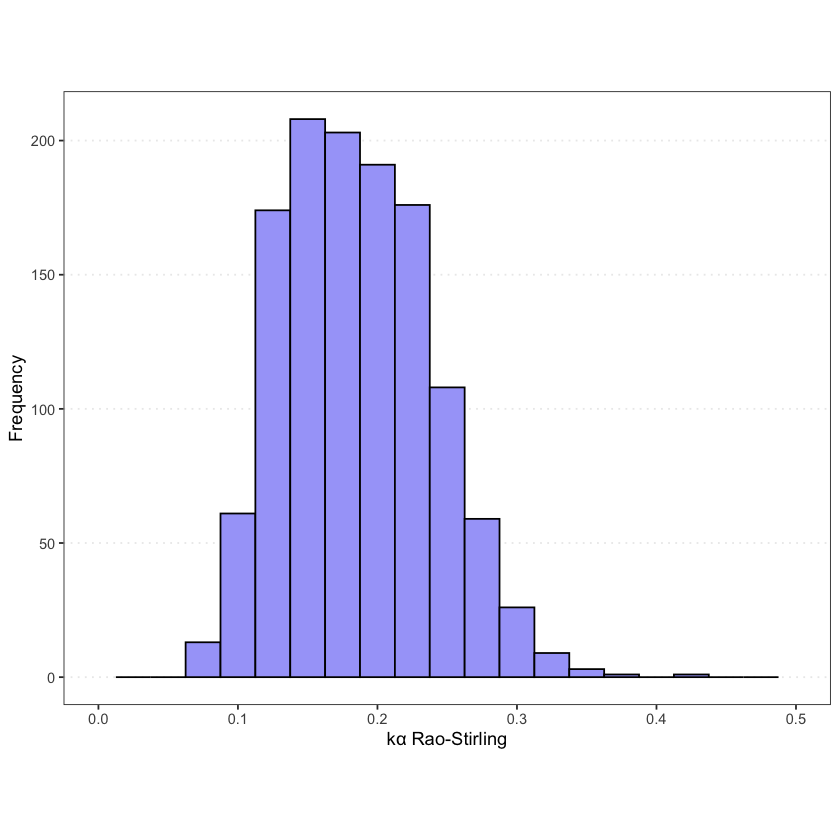

In [15]:
ggplot(df, aes(x = diversity_clean)) + 
  geom_histogram(binwidth = 0.025, color = "black", fill = "#a7a7f9") +
  xlim(0, 0.5) +
  theme_bw() +
  theme(panel.grid.major.y = element_line(linetype = "dotted"),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        aspect.ratio = 0.8) +
  labs(x = 'k\U03b1 Rao-Stirling', y = 'Frequency')


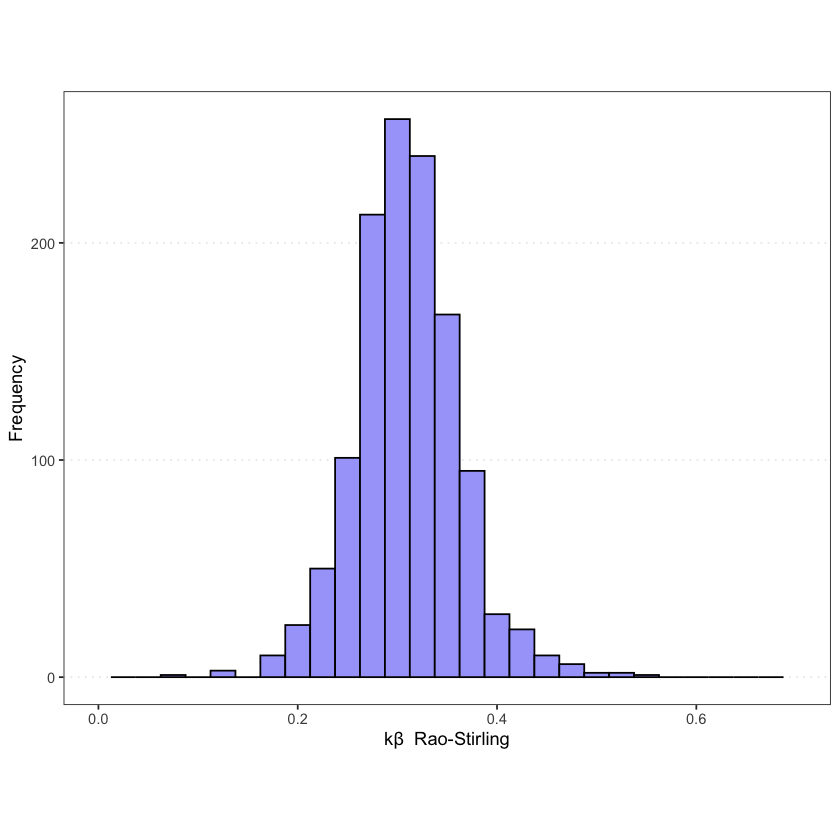

In [16]:
ggplot(df, aes(x = diversity_clean_2)) + 
  geom_histogram(binwidth = 0.025, color = "black", fill = "#a7a7f9") +
  xlim(0, 0.7) +
  theme_bw() +
  theme(panel.grid.major.y = element_line(linetype = "dotted"),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        aspect.ratio = 0.8) +
  labs(x = 'k\U03b2  Rao-Stirling', y = 'Frequency')


Radar charts

In [ ]:
# Adjust options to display all columns of the data frame
options(width = 10000)

# Convert columns 15 and 16 to numeric
df_3[, 15:16] <- lapply(df_3[, 15:16], as.numeric)

# Create a new data frame to store scaled values
scaled_df <- data.frame(df_3)

# Rescale loudness, tempo, and duration to the range 0-1
scaled_df$loudness <- scale(scaled_df$loudness, center = min(scaled_df$loudness), scale = max(scaled_df$loudness) - min(scaled_df$loudness))
scaled_df$tempo <- scale(scaled_df$tempo, center = min(scaled_df$tempo), scale = max(scaled_df$tempo) - min(scaled_df$tempo))
scaled_df$duration_ms <- scale(scaled_df$duration_ms, center = min(scaled_df$duration_ms), scale = max(scaled_df$duration_ms) - min(scaled_df$duration_ms))

# Subset your scaled dataframe to select the tracks you want to compare
selected_tracks <- scaled_df[scaled_df$track_name %in% c("I Feel It Coming", "November Rain"), ]

# Print the values for the selected tracks
for (track_name in unique(selected_tracks$track_name)) {
  track_data <- selected_tracks[selected_tracks$track_name == track_name, 7:16]
  cat("Track:", track_name, "\n")
  print(track_data)
  cat("\n")
}


OLS models

Robusts OLS

In [8]:
# Fit your robust linear regression 
lm_1 <- lm(diversity_norm ~ followers_class + nb_tracks + track_pop + type, data = df)
lm_1_1 <- lm(diversity_norm ~ type, data = df)

lm1_robust_clustered <- coeftest(lm_1, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
lm1_1_robust_clustered <- coeftest(lm_1_1, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
print(lm1_robust_clustered)

lm_2 <- lm(diversity_norm_2 ~ followers_class + nb_tracks + track_pop + type, data = df)
lm_2_1 <- lm(diversity_norm_2 ~ type, data = df)

lm2_robust_clustered <- coeftest(lm_2, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
lm2_1_robust_clustered <- coeftest(lm_2_1, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
print(lm2_robust_clustered)

stargazer(lm1_1_robust_clustered, lm1_robust_clustered, lm2_1_robust_clustered, lm2_robust_clustered)



t test of coefficients:

                           Estimate  Std. Error t value Pr(>|t|)  
(Intercept)              0.77395770  0.25183230  3.0733  0.09156 .
followers_classlow       0.07661778  0.03143409  2.4374  0.13505  
followers_classmid_high -0.11091429  0.03214179 -3.4508  0.07469 .
followers_classmid_low  -0.15417234  0.09661257 -1.5958  0.25160  
nb_tracks               -0.00267647  0.00027943 -9.5783  0.01072 *
track_pop               -0.00907255  0.00486412 -1.8652  0.20315  
typemood                -0.07265781  0.01045350 -6.9506  0.02008 *
typetrend                0.18892149  0.03221844  5.8638  0.02787 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


t test of coefficients:

                           Estimate  Std. Error t value Pr(>|t|)    
(Intercept)              1.01170419  0.32111725  3.1506 0.087695 .  
followers_classlow       0.19683690  0.09297754  2.1170 0.168468    
followers_classmid_high -0.13013067  0.01347498 -9.6572 0.010553 *  
f

In [19]:
stargazer(lm_1_1, lm_1, lm_2_1, lm_2)



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Feb 20, 2024 - 14:29:42
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & \multicolumn{2}{c}{diversity\_norm} & \multicolumn{2}{c}{diversity\_norm\_2} \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 followers\_classlow &  & 0.077 &  & 0.197$^{**}$ \\ 
  &  & (0.097) &  & (0.085) \\ 
  & & & & \\ 
 followers\_classmid\_high &  & $-$0.111 &  & $-$0.130$^{*}$ \\ 
  &  & (0.080) &  & (0.070) \\ 
  & & & & \\ 
 followers\_classmid\_low &  & $-$0.154$^{*}$ &  & $-$0.024 \\ 
  &  & (0.085) &  & (0.075) \\ 
  & & & & \\ 
 nb\_tracks &  & $-$0.003$^{***}$ &  & $-$0.005$^{***}$ \\ 
  &  & (0.0004) &  & (0.0003) \\ 
  & & & & \\ 
 track\_pop &  & $-$0.009$^{***}$ &  & $-$0.010$^{*

Robust OLS Comparison 

In [14]:
# Perform OLS HHI*
lm_3 <- lm(hhi_norm ~ followers_class + nb_tracks + track_pop + type, data = df)
lm_3_1 <- lm(hhi_norm ~ type, data = df)

lm3_robust_clustered <- coeftest(lm_3, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
lm3_1_robust_clustered <- coeftest(lm_3_1, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
print(lm3_robust_clustered)

# Perform OLS HHI**
lm_4 <- lm(hhi_norm_2 ~ followers_class + nb_tracks + track_pop + type, data = df)
lm_4_1 <- lm(hhi_norm_2 ~ type, data = df)

lm4_robust_clustered <- coeftest(lm_4, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
lm4_1_robust_clustered <- coeftest(lm_4_1, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
print(lm4_robust_clustered)

stargazer(lm3_1_robust_clustered, lm3_robust_clustered, lm4_1_robust_clustered, lm4_robust_clustered)



t test of coefficients:

                           Estimate  Std. Error t value Pr(>|t|)   
(Intercept)             -0.07941121  0.18266693 -0.4347 0.706168   
followers_classlow       0.02682567  0.07561771  0.3548 0.756690   
followers_classmid_high  0.02331953  0.06286957  0.3709 0.746301   
followers_classmid_low   0.13810049  0.08235804  1.6768 0.235571   
nb_tracks               -0.00061833  0.00058265 -1.0612 0.399790   
track_pop                0.00071906  0.00393680  0.1827 0.871910   
typemood                 0.06174020  0.00506495 12.1897 0.006663 **
typetrend                0.27359124  0.03746343  7.3029 0.018239 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


t test of coefficients:

                           Estimate  Std. Error t value Pr(>|t|)   
(Intercept)             -0.03892301  0.16870629 -0.2307 0.838989   
followers_classlow       0.14987493  0.05534893  2.7078 0.113608   
followers_classmid_high  0.16000466  0.02475139  6.4645 0.023103

In [15]:
stargazer(lm_3_1, lm_3, lm_4_1, lm_4)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Thu, Feb 22, 2024 - 11:42:04
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & \multicolumn{2}{c}{hhi\_norm} & \multicolumn{2}{c}{hhi\_norm\_2} \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 followers\_classlow &  & 0.027 &  & 0.150 \\ 
  &  & (0.101) &  & (0.100) \\ 
  & & & & \\ 
 followers\_classmid\_high &  & 0.023 &  & 0.160$^{*}$ \\ 
  &  & (0.083) &  & (0.083) \\ 
  & & & & \\ 
 followers\_classmid\_low &  & 0.138 &  & 0.110 \\ 
  &  & (0.089) &  & (0.088) \\ 
  & & & & \\ 
 nb\_tracks &  & $-$0.001 &  & $-$0.002$^{***}$ \\ 
  &  & (0.0004) &  & (0.0004) \\ 
  & & & & \\ 
 track\_pop &  & 0.001 &  & 0.001 \\ 
  &  & (0.002) &  & (0.002) \\ 
  & & & & \\ 
 typemood & 

In [16]:
# Perform OLS Dist*
lm_5 <- lm(dist ~ followers_class + nb_tracks + track_pop + type, data = df)
lm_5_1 <- lm(dist ~ type, data = df)

lm5_robust_clustered <- coeftest(lm_5, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
lm5_1_robust_clustered <- coeftest(lm_5_1, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
print(lm5_robust_clustered)

# Perform OLS Dist**
lm_6 <- lm(dist_2 ~ followers_class + nb_tracks + track_pop + type, data = df)
lm_6_1 <- lm(dist_2 ~ type, data = df)

lm6_robust_clustered <- coeftest(lm_6, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
lm6_1_robust_clustered <- coeftest(lm_6_1, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
print(lm6_robust_clustered)

stargazer(lm5_1_robust_clustered, lm5_robust_clustered, lm6_1_robust_clustered, lm6_robust_clustered)



t test of coefficients:

                           Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)              0.67514659  0.19066834   3.5409 0.0713276 .  
followers_classlow       0.13563529  0.03324941   4.0793 0.0551671 .  
followers_classmid_high -0.12057659  0.03757395  -3.2090 0.0849198 .  
followers_classmid_low  -0.08832709  0.09677628  -0.9127 0.4577482    
nb_tracks               -0.00268071  0.00017706 -15.1402 0.0043342 ** 
track_pop               -0.00835965  0.00321853  -2.5974 0.1217460    
typemood                -0.05276155  0.00756384  -6.9755 0.0199392 *  
typetrend                0.43254188  0.01223281  35.3592 0.0007989 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


t test of coefficients:

                           Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)              0.76212210  0.31885759  2.3902 0.1393644    
followers_classlow       0.38145907  0.14784826  2.5801 0.1230924    
followers_classmid_high  0.0117

In [17]:
stargazer(lm_5_1, lm_5, lm_6_1, lm_6)



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Thu, Feb 22, 2024 - 11:46:59
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & \multicolumn{2}{c}{dist} & \multicolumn{2}{c}{dist\_2} \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 followers\_classlow &  & 0.136 &  & 0.381$^{***}$ \\ 
  &  & (0.095) &  & (0.082) \\ 
  & & & & \\ 
 followers\_classmid\_high &  & $-$0.121 &  & 0.012 \\ 
  &  & (0.079) &  & (0.068) \\ 
  & & & & \\ 
 followers\_classmid\_low &  & $-$0.088 &  & 0.107 \\ 
  &  & (0.084) &  & (0.072) \\ 
  & & & & \\ 
 nb\_tracks &  & $-$0.003$^{***}$ &  & $-$0.006$^{***}$ \\ 
  &  & (0.0004) &  & (0.0003) \\ 
  & & & & \\ 
 track\_pop &  & $-$0.008$^{***}$ &  & $-$0.007$^{***}$ \\ 
  &  & (0.002) &  & (0.002) \\

In [22]:
stargazer(lm1_1_robust_clustered, lm1_robust_clustered, lm3_1_robust_clustered, lm3_robust_clustered, lm5_1_robust_clustered, lm5_robust_clustered)



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Feb 20, 2024 - 14:34:02
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{\textit{Dependent variable:}} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{6}{c}{ } \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6)\\ 
\hline \\[-1.8ex] 
 followers\_classlow &  & 0.077 &  & 0.027 &  & 0.136$^{*}$ \\ 
  &  & (0.031) &  & (0.076) &  & (0.033) \\ 
  & & & & & & \\ 
 followers\_classmid\_high &  & $-$0.111$^{*}$ &  & 0.023 &  & $-$0.121$^{*}$ \\ 
  &  & (0.032) &  & (0.063) &  & (0.038) \\ 
  & & & & & & \\ 
 followers\_classmid\_low &  & $-$0.154 &  & 0.138 &  & $-$0.088 \\ 
  &  & (0.097) &  & (0.082) &  & (0.097) \\ 
  & & & & & & \\ 
 nb\_tracks &  & $-$0.003$^{**}$ &  & $-$0.001 &  & $-$0.003$^{***}$ \\ 
  &  & (0.0003) &  & (0.001) &  & (0.0002) \

In [23]:
stargazer(lm_1_1, lm_1, lm_3_1, lm_3, lm_5_1, lm_5)



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Feb 20, 2024 - 14:38:37
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{\textit{Dependent variable:}} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{2}{c}{diversity\_norm} & \multicolumn{2}{c}{hhi\_norm} & \multicolumn{2}{c}{dist} \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6)\\ 
\hline \\[-1.8ex] 
 followers\_classlow &  & 0.077 &  & 0.027 &  & 0.136 \\ 
  &  & (0.097) &  & (0.101) &  & (0.095) \\ 
  & & & & & & \\ 
 followers\_classmid\_high &  & $-$0.111 &  & 0.023 &  & $-$0.121 \\ 
  &  & (0.080) &  & (0.083) &  & (0.079) \\ 
  & & & & & & \\ 
 followers\_classmid\_low &  & $-$0.154$^{*}$ &  & 0.138 &  & $-$0.088 \\ 
  &  & (0.085) &  & (0.089) &  & (0.084) \\ 
  & & & & & & \\ 
 nb\_tracks &  & $-$0.003$^{***}$ &  & $-$0.001 &  & $-$

In [24]:
stargazer(lm2_1_robust_clustered, lm2_robust_clustered, lm4_1_robust_clustered, lm4_robust_clustered, lm6_1_robust_clustered, lm6_robust_clustered)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Feb 20, 2024 - 14:40:17
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{\textit{Dependent variable:}} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{6}{c}{ } \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6)\\ 
\hline \\[-1.8ex] 
 followers\_classlow &  & 0.197 &  & 0.150 &  & 0.381 \\ 
  &  & (0.093) &  & (0.055) &  & (0.148) \\ 
  & & & & & & \\ 
 followers\_classmid\_high &  & $-$0.130$^{**}$ &  & 0.160$^{**}$ &  & 0.012 \\ 
  &  & (0.013) &  & (0.025) &  & (0.014) \\ 
  & & & & & & \\ 
 followers\_classmid\_low &  & $-$0.024 &  & 0.110 &  & 0.107 \\ 
  &  & (0.088) &  & (0.057) &  & (0.124) \\ 
  & & & & & & \\ 
 nb\_tracks &  & $-$0.005$^{**}$ &  & $-$0.002$^{**}$ &  & $-$0.006$^{**}$ \\ 
  &  & (0.001) &  & (0.0003) &  & (0.001) \\ 
  

In [25]:
stargazer(lm_2_1, lm_2, lm_4_1, lm_4, lm_6_1, lm_6)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Feb 20, 2024 - 14:42:05
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{\textit{Dependent variable:}} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{2}{c}{diversity\_norm\_2} & \multicolumn{2}{c}{hhi\_norm\_2} & \multicolumn{2}{c}{dist\_2} \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6)\\ 
\hline \\[-1.8ex] 
 followers\_classlow &  & 0.197$^{**}$ &  & 0.150 &  & 0.381$^{***}$ \\ 
  &  & (0.085) &  & (0.100) &  & (0.082) \\ 
  & & & & & & \\ 
 followers\_classmid\_high &  & $-$0.130$^{*}$ &  & 0.160$^{*}$ &  & 0.012 \\ 
  &  & (0.070) &  & (0.083) &  & (0.068) \\ 
  & & & & & & \\ 
 followers\_classmid\_low &  & $-$0.024 &  & 0.110 &  & 0.107 \\ 
  &  & (0.075) &  & (0.088) &  & (0.072) \\ 
  & & & & & & \\ 
 nb\_tracks &  & $-$0.005$^{***}

Robustness checks

Control for clusters

In [11]:
# Perform OLS
lm_1_2 <- lm(diversity_norm ~ followers_class + nb_tracks + track_pop + type + as.numeric(nb_clusters), data = df)
lm1_2_robust_clustered <- coeftest(lm_1_2, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
summary(lm_1_2)

# Perform OLS
lm_2_2 <- lm(diversity_norm_2 ~ followers_class + nb_tracks + track_pop + type + as.numeric(nb_clusters_2), data = df)
lm2_2_robust_clustered <- coeftest(lm_2_2, vcov = vcovCL, type = "HC1", df = 2, cluster = ~type)
summary(lm_2_2)

stargazer(lm1_1_robust_clustered, lm1_robust_clustered, lm1_2_robust_clustered, lm2_1_robust_clustered, lm2_robust_clustered, lm2_2_robust_clustered)



Call:
lm(formula = diversity_norm ~ followers_class + nb_tracks + track_pop + 
    type + as.numeric(nb_clusters), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2568 -0.3709 -0.0474  0.3364  3.4268 

Coefficients:
                          Estimate Std. Error t value             Pr(>|t|)    
(Intercept)             -1.9803164  0.1111103 -17.823 < 0.0000000000000002 ***
followers_classlow       0.1148585  0.0585048   1.963               0.0498 *  
followers_classmid_high -0.0455986  0.0483019  -0.944               0.3453    
followers_classmid_low  -0.0392297  0.0514373  -0.763               0.4458    
nb_tracks               -0.0034164  0.0002396 -14.260 < 0.0000000000000002 ***
track_pop               -0.0073326  0.0012597  -5.821        0.00000000748 ***
typemood                -0.0383222  0.0361326  -1.061               0.2891    
typetrend                0.2694851  0.0580025   4.646        0.00000374850 ***
as.numeric(nb_clusters)  0.9906204  0.0214812  46.116


Call:
lm(formula = diversity_norm_2 ~ followers_class + nb_tracks + 
    track_pop + type + as.numeric(nb_clusters_2), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7080 -0.4247 -0.0315  0.3724  6.1639 

Coefficients:
                            Estimate Std. Error t value             Pr(>|t|)
(Intercept)               -0.9997045  0.1457198  -6.860      0.0000000000109
followers_classlow         0.2224244  0.0716884   3.103              0.00196
followers_classmid_high   -0.0642623  0.0592323  -1.085              0.27817
followers_classmid_low    -0.0191302  0.0629529  -0.304              0.76127
nb_tracks                 -0.0058720  0.0002936 -19.997 < 0.0000000000000002
track_pop                 -0.0098023  0.0015430  -6.353      0.0000000002974
typemood                  -0.0703080  0.0442825  -1.588              0.11261
typetrend                  0.4796182  0.0710417   6.751      0.0000000000226
as.numeric(nb_clusters_2)  0.2557269  0.0114103  22.412 < 0.0000000


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Thu, Feb 22, 2024 - 10:43:15
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{\textit{Dependent variable:}} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{6}{c}{ } \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6)\\ 
\hline \\[-1.8ex] 
 followers\_classlow &  & 0.077 & 0.115$^{**}$ &  & 0.197 & 0.222$^{*}$ \\ 
  &  & (0.031) & (0.024) &  & (0.093) & (0.057) \\ 
  & & & & & & \\ 
 followers\_classmid\_high &  & $-$0.111$^{*}$ & $-$0.046 &  & $-$0.130$^{**}$ & $-$0.064$^{*}$ \\ 
  &  & (0.032) & (0.050) &  & (0.013) & (0.017) \\ 
  & & & & & & \\ 
 followers\_classmid\_low &  & $-$0.154 & $-$0.039 &  & $-$0.024 & $-$0.019 \\ 
  &  & (0.097) & (0.026) &  & (0.088) & (0.066) \\ 
  & & & & & & \\ 
 nb\_tracks &  & $-$0.003$^{**}$ & $-$0.003$^{***}$ &  

In [18]:
stargazer(lm_1_1, lm_1, lm_1_2, lm_2_1, lm_2, lm_2_2)



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Feb 20, 2024 - 15:55:12
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{\textit{Dependent variable:}} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{3}{c}{diversity\_norm} & \multicolumn{3}{c}{diversity\_norm\_2} \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6)\\ 
\hline \\[-1.8ex] 
 followers\_classlow &  & 0.077 & 0.115$^{**}$ &  & 0.197$^{**}$ & 0.222$^{***}$ \\ 
  &  & (0.097) & (0.059) &  & (0.085) & (0.072) \\ 
  & & & & & & \\ 
 followers\_classmid\_high &  & $-$0.111 & $-$0.046 &  & $-$0.130$^{*}$ & $-$0.064 \\ 
  &  & (0.080) & (0.048) &  & (0.070) & (0.059) \\ 
  & & & & & & \\ 
 followers\_classmid\_low &  & $-$0.154$^{*}$ & $-$0.039 &  & $-$0.024 & $-$0.019 \\ 
  &  & (0.085) & (0.051) &  & (0.075) & (0.063) \\ 
  & & & & & & \\

Multicolinearity

In [13]:
vif(lm_1)


,GVIF,Df,GVIF^(1/(2*Df))
followers_class,1.643074,3,1.086283
nb_tracks,1.147745,1,1.071329
track_pop,1.498527,1,1.224143
type,1.168790,2,1.039762


Test on silhouette scores

In [ ]:
# create a list of file names and corresponding is_editorial values
file_names <- c("robust_afro.xlsx", "robust_alternatif.xlsx", "robust_ambiance.xlsx", "robust_ambient.xlsx",
                "robust_amour.xlsx", "robust_arabe.xlsx", "robust_bienetre.xlsx", "robust_blues.xlsx",
                "robust_classique.xlsx", "robust_country.xlsx", "robust_decennies.xlsx", "robust_detente.xlsx",
                "robust_dormir.xlsx", "robust_electro.xlsx", "robust_enfants.xlsx", "robust_equal.xlsx",
                "robust_ete.xlsx", "robust_etudiants.xlsx"
                )

df_list <- list()
for (i in seq_along(file_names)) {
  file_name <- file_names[i]
  df <- read_xlsx(file_name)
  df_list[[i]] <- df
}

df_robust <- Reduce(function(x, y) merge(x, y, all = TRUE), df_list)


In [ ]:
# Perform paired t-tests
t_test_5_6 <- t.test(df_robust$silhouette_score_5, df_robust$silhouette_score_6, paired = TRUE)
cohen_d_5_6 <- cohen.d(df_robust$silhouette_score_5, df_robust$silhouette_score_6, hedges.correction = TRUE)
t_test_5_6
cohen_d_5_6

t_test_5_4 <- t.test(df_robust$silhouette_score_5, df_robust$silhouette_score_4, paired = TRUE)
cohen_d_5_4 <- cohen.d(df_robust$silhouette_score_5, df_robust$silhouette_score_4, hedges.correction = TRUE)
t_test_5_4
cohen_d_5_4

t_test_5_6_2 <- t.test(df_robust$silhouette_score_5_2, df_robust$silhouette_score_6_2, paired = TRUE)
cohen_d_5_6_2 <- cohen.d(df_robust$silhouette_score_5_2, df_robust$silhouette_score_6_2, hedges.correction = TRUE)
t_test_5_6_2
cohen_d_5_6_2

t_test_5_4_2 <- t.test(df_robust$silhouette_score_5_2, df_robust$silhouette_score_4_2, paired = TRUE)
cohen_d_5_4_2 <- cohen.d(df_robust$silhouette_score_5_2, df_robust$silhouette_score_4_2, hedges.correction = TRUE)
t_test_5_4_2
cohen_d_5_4_2
